# 1- Problem Statement

## Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

## Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

# 2 - Initiall Preparation

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, make_scorer

# to handle warnings
import warnings
warnings.filterwarnings('ignore')


## Setting Constant Values

In [2]:
# Define constants for file paths
# and other configurations
FOLDER = 'data/'
FILE = "Loan_Modelling.csv"
# Set the random seed for reproducibility
RS = 1
# Set the test size for train-test split
TEST_SIZE = 0.3

## Loading the Dataset

In [3]:
# Load the dataset
df = pd.read_csv(FOLDER + FILE)
# Create a copy of the data
data = df.copy()

# 3 - Data Overview

## Observations

### Sample some entries in the data

In [4]:
# Observe the first few rows of the dataset
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
# Observe the last few rows of the dataset
data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### Size and Datatype

In [6]:
# shape of the dataset
data.shape

(5000, 14)

* The dataset has 14 columns and 5000 rows

In [7]:
# Observe the data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* 13 columns are type integer and only CCAvg is float

### Statistical Summary

In [8]:
# Observe the statistical summary of the dataset
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

* **ID** - A unique identifier.  
* **Age** - The minimum age is 23 years, and the maximum age is 67. The average and median age is 45 years.  
* **Income** - Income ranges from a minimum of $8,000 to a maximum of $224,000. The average income is $73,000, and the median is $64,000.  
* **CCAvg** - Average credit card spending ranges from $0 to $10,000, with a mean of $1,938 and a median of $1,500.  
* **Mortgage** - Ranges from $0 to $635,000. Many customers do not have a mortgage.  
* **ZIP Code** - A categorical value. Statistical summaries do not provide meaningful insights.  
* **Family**, **Education**, **Personal_Loan**, **Securities_Account**, **CD_Account**, **Online**, and **CreditCard** are categorical variables.  

### Understanding the Variables

#### Age

In [9]:
# Understand Age values
data["Age"].value_counts().sort_values(ascending=False).head(10)

Age
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
Name: count, dtype: int64

* For variable Age all values are positive integers. There are no typos or errors in the data

#### Experience

In [10]:
# Understand Experience values
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

* For the Experience Variable, mostly looks good, but there seems to be some negative values. The negative numbers seem to be a typo as there can be a negative experience. Let's convert to positive numbers.

#### ZIP Code

In [11]:
# Understand ZipCode values
ZIPCount = data["ZIPCode"].value_counts()
print(f"{ZIPCount.count()} unique ZIP Codes")
print(f"{len(ZIPCount[ZIPCount >= 2])} ZIP Codes with more than 1 entry")
print(f"{len(ZIPCount[ZIPCount == 1])} ZIP Codes with only 1 entry")

467 unique ZIP Codes
456 ZIP Codes with more than 1 entry
11 ZIP Codes with only 1 entry


* ZIP Code is a category variable. Having 467 categories can complicate the EDA and Model Building. In the Data Preparation it will be reduce.

#### Family

In [12]:
# Understand Family categories
data["Family"].value_counts()

Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64

* The mode for Family variable is 1, as it has 1472 entries. The data looks correct with families ranging from 1 to 4 members. 

#### Education

In [13]:
# Understand Education categories
data["Education"].value_counts()

Education
1    2096
3    1501
2    1403
Name: count, dtype: int64

* The education variable has a mode of 1, refers to undergraduate. The data looks correct as all values are in the range of 1 to 3 as especified in the data dictionary.

#### Personal Loan

In [14]:
# Understan Personal Loan categories
data["Personal_Loan"].value_counts()

Personal_Loan
0    4520
1     480
Name: count, dtype: int64

* The data looks correct as it is a bianary variable. With 4520 customers didn't accept the last Personal Loan campaign and 480 customers did accept the Personal Loan campaign. 

#### Securities Account

In [15]:
data["Securities_Account"].value_counts()

Securities_Account
0    4478
1     522
Name: count, dtype: int64

* The data looks correct as it is a bianary variable. With 4478 customers don't have a Securities Account 522 customers have a Securities account. 

#### CD Account

In [16]:
data["CD_Account"].value_counts()

CD_Account
0    4698
1     302
Name: count, dtype: int64

* The data looks correct as it is a bianary variable. With 4698 customers don't have a CD Account 302 customers have a CD account. 

In [17]:
data["Online"].value_counts()

Online
1    2984
0    2016
Name: count, dtype: int64

* The data looks correct as it is a bianary variable. With 2984 customers use Online and 2016 don't use Online.

In [18]:
data["CreditCard"].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

* The data looks correct as it is a bianary variable. With 3530 customers don't have a Credit Card and  1470 customers have a Credit Cardt. 

## Data Preprocessing

### Duplicated Data

In [19]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

* There is no duplicates. Each row corresponds to a unique customer

### Removing ID Variable from Analysis

The ID variable serves as a unique customer identifier with no intrinsic predictive value. For our machine learning pipeline, we will remove this feature in order to simplify.

In [20]:
data = data.drop(columns=['ID'])

In [21]:
data.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

### Handling Negative Values in Experience Data

During exploratory data analysis, we identified negative values in the experience variable. Since negative experience years are logically impossible, these values likely represent data entry errors or measurement artifacts. 

To address this issue, we applied the absolute value transformation to ensure all experience values are non-negative. This approach preserves the magnitude of the recorded values while correcting the invalid negative signs.

In [22]:
# use abs function to convert negative values to positive
data["Experience"] = data["Experience"].abs()
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

* Expereince now has positive numbers.

### Reducing ZIP Code Categories
Analysis of the ZIP Code variable revealed 467 unique values, comprising:

* 456 ZIP Codes with multiple occurrences

* 11 ZIP Codes appearing only once

Given the high cardinality of this feature, we will reduce dimensionality by utilizing only the first three digits of each ZIP Code. This approach maintains meaningful geographic information while significantly decreasing category count, as the initial digits represent:

| Digit(s) | Purpose | Example (`90210`) |  
|----------|---------|-------------------|  
| **1st** | Region (0-9) | `9` = West (CA, HI, AK) |  
| **2nd-3rd** | Sectional Center (mail hub) | `02` = Beverly Hills area |  
| **4th-5th** | Delivery zone | `10` = Specific part of Beverly Hills |  

In [23]:

# Evaluate if using the first 3 digits in ZIPCode reduces the number of categories significatevely.
ZIPdata = data["ZIPCode"].astype(str)
ZIPdata = ZIPdata.str[0:3]
ZIPdata.nunique()


57

Using the first 3 digits of ZIP Code the number of categories was reduced from 467 to 57 categories. Still many categories to handle in the model. 

In [24]:
# Evaluate if using the first 2 digits in ZIPCode reduces the number of categories significatevely.
ZIPdata = data["ZIPCode"].astype(str)
ZIPdata = ZIPdata.str[0:2]
ZIPdata.nunique()

7

Using the first 2 digits reduces from 467 to 7 categories. This number of categories is more managable and simple, while still providing geographycal meaning to the segmentation of customers. 

In [25]:
# Implementing the first 2 digits in ZIPCode
# to reduce the number of categories
data["ZIPCode"] = data["ZIPCode"].astype(str)
data["ZIPCode"] = data["ZIPCode"].str[:2]

* ZIP Code now only has 7 categories.

### Conversion of Numeric Variables to Categorical Type

Several numeric variables in the dataset (e.g., Education, Family size) actually represent discrete categories rather than continuous values. Converting these to categorical type will Improve EDA effectiveness and Prevent analytical errors. It will enable proper visualization of frequency distributions in the EDA and avoid misleading statistical summaries 


In [26]:
columns = ["ZIPCode", "Education", "Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard",]
data[columns] = data[columns].astype("category")

### Summary After Data Preparation

In [27]:
# Observe the data types of the columns after data preparation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


The dataframe has 8 category variables, 4 integer variables and 1 float variable. 

In [28]:
# Statistical summary of the dataset after data preparation
data.describe().T

count       mean         std   min   25%   50%    75%    max
Age         5000.0  45.338400   11.463166  23.0  35.0  45.0   55.0   67.0
Experience  5000.0  20.134600   11.415189   0.0  10.0  20.0   30.0   43.0
Income      5000.0  73.774200   46.033729   8.0  39.0  64.0   98.0  224.0
Family      5000.0   2.396400    1.147663   1.0   1.0   2.0    3.0    4.0
CCAvg       5000.0   1.937938    1.747659   0.0   0.7   1.5    2.5   10.0
Mortgage    5000.0  56.498800  101.713802   0.0   0.0   0.0  101.0  635.0

# 4 - Exploratory Data Analysis.

#### Functions to generate plot sets.

In [29]:
def plot_numerical_distributions(data, numerical_features, hue=None, figsize=(16, 12), dpi=100, bins=30, palette="viridis", plot_style="whitegrid", show_median=True):
    
    # Set style and palette
    sns.set_style(plot_style)
    sns.set_palette(palette)
    
    # Calculate grid dimensions
    n_cols = 2
    n_rows = (len(numerical_features) // n_cols) + (1 if len(numerical_features) % n_cols else 0)
    
    # Create figure
    fig = plt.figure(figsize=figsize, dpi=dpi)
    fig.suptitle('Distribution Analysis', y=1.02, fontsize=16, fontweight='bold')
    
    for i, feature in enumerate(numerical_features, 1):
        ax = plt.subplot(n_rows, n_cols, i)
        
        # Plot histogram with KDE
        sns.histplot(data=data, x=feature, hue=hue, kde=True, bins=bins, edgecolor='white', linewidth=0.5, stat='count', alpha=0.7)
        
        # Add median line
        if show_median:
            median = data[feature].median()
            ax.axvline(median, color='red', linestyle='--', linewidth=1.5)
            ax.text(median*1.05, ax.get_ylim()[1]*0.9, 
                    f'Median: {median:.1f}', color='red')
        
        # Formatting
        ax.set_title(f'{feature} Distribution', pad=10)
        ax.set_xlabel('')
        ax.grid(alpha=0.3)
    
    plt.tight_layout()
    
    return fig

In [30]:
def plot_categorical_distributions(data, categorical_features, hue="",figsize=(16, 18), palette="viridis", plot_style="whitegrid", annotate=True, rotate_labels=False):
    # Set visual style
    sns.set_style(plot_style)
    plt.rcParams['font.size'] = 12
    
    # Calculate grid dimensions
    n_cols = 2
    n_rows = (len(categorical_features) // n_cols) + (1 if len(categorical_features) % n_cols else 0)
    
    # Initialize figure
    fig = plt.figure(figsize=figsize, dpi=100, layout="constrained")
    fig.suptitle('Distribution Analysis', fontsize=18, fontweight='bold', y=1.02)
    
    # Create subplots
    for idx, feature in enumerate(categorical_features, start=1):
        ax = fig.add_subplot(n_rows, n_cols, idx)
        
        # Plot with improved aesthetics
        if hue:
            # If hue is provided, use countplot with hue
            plot = sns.countplot(data=data, x=feature, hue=hue, palette=palette, edgecolor='black', linewidth=0.5, alpha=0.85)
        else:
            # If no hue is provided, use countplot without hue
            plot = sns.countplot(data=data, x=feature, palette=palette, edgecolor='black', linewidth=0.5, alpha=0.85, order=data[feature].value_counts().index)  # Sort by frequency
        
        # Add count annotations
        if annotate:
            for p in ax.patches:
                ax.annotate(
                    f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points',
                    fontsize=10
                )
        
        # Rotate labels if needed
        if rotate_labels:
            plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
        
        # Format subplot
        ax.set_title(f'{feature} Distribution', pad=12, fontweight='semibold')
        ax.set_xlabel('')
        ax.set_ylabel('Count', fontsize=12)
        ax.grid(visible=True, alpha=0.2, axis='y')
        
        # Remove top/right spines
        sns.despine(ax=ax, top=True, right=True)
        
    return fig



In [31]:
def plot_numerical_boxplots(data, numerical_features, figsize=(16, 12), palette="viridis", plot_style="whitegrid", showfliers=True, notch=False, orient="v", hue=None):

    # Set visual style
    sns.set_style(plot_style)
    plt.rcParams['font.size'] = 12
    
    # Calculate grid dimensions
    n_cols = 2
    n_rows = (len(numerical_features) // n_cols) + (1 if len(numerical_features) % n_cols else 0)
    
    # Initialize figure
    fig = plt.figure(figsize=figsize, dpi=100, layout="constrained")
    fig.suptitle('Numerical Features Distribution Analysis (Boxplots)', fontsize=18, fontweight='bold', y=1.02)
    
    # Create subplots
    for idx, feature in enumerate(numerical_features, start=1):
        ax = fig.add_subplot(n_rows, n_cols, idx)
        
        # Plot boxplot with enhanced aesthetics
        sns.boxplot(
            data=data,
            x=feature if orient == "v" else None,
            y=None if orient == "v" else feature,
            hue=hue,
            palette=palette,
            width=0.6,
            showfliers=showfliers,
            notch=notch,
            linewidth=1.5,
            fliersize=3,
            saturation=0.8
        )
        

        
        # Add mean marker
        mean_val = data[feature].mean()
        if orient == "v":
            ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.2, label=f'Mean: {mean_val:.1f}')
        else:
            ax.axhline(mean_val, color='red', linestyle='--', linewidth=1.2, label=f'Mean: {mean_val:.1f}')
        ax.legend(loc='upper right')
        
        # Format subplot
        ax.set_title(f'{feature} Distribution', pad=12, fontweight='semibold')
        if orient == "v":
            ax.set_ylabel('Value', fontsize=12)
        else:
            ax.set_xlabel('Value', fontsize=12)
        ax.grid(visible=True, alpha=0.2, axis='y' if orient == "v" else 'x')
        
        # Remove top/right spines
        sns.despine(ax=ax, top=True, right=True)
    
    # Add figure caption
    caption = "Note: Red dashed line shows mean value. Box shows IQR (25th-75th percentile)"
    if showfliers:
        caption += ". Points show outliers."
    if hue:
        caption += f" Grouped by {hue}."
    fig.text(
        0.5, 0.01,
        caption,
        ha='center',
        fontsize=12,
        color='dimgray'
    )
    
    return fig

## Univariate Analysis

### Numerical Variables Distribution

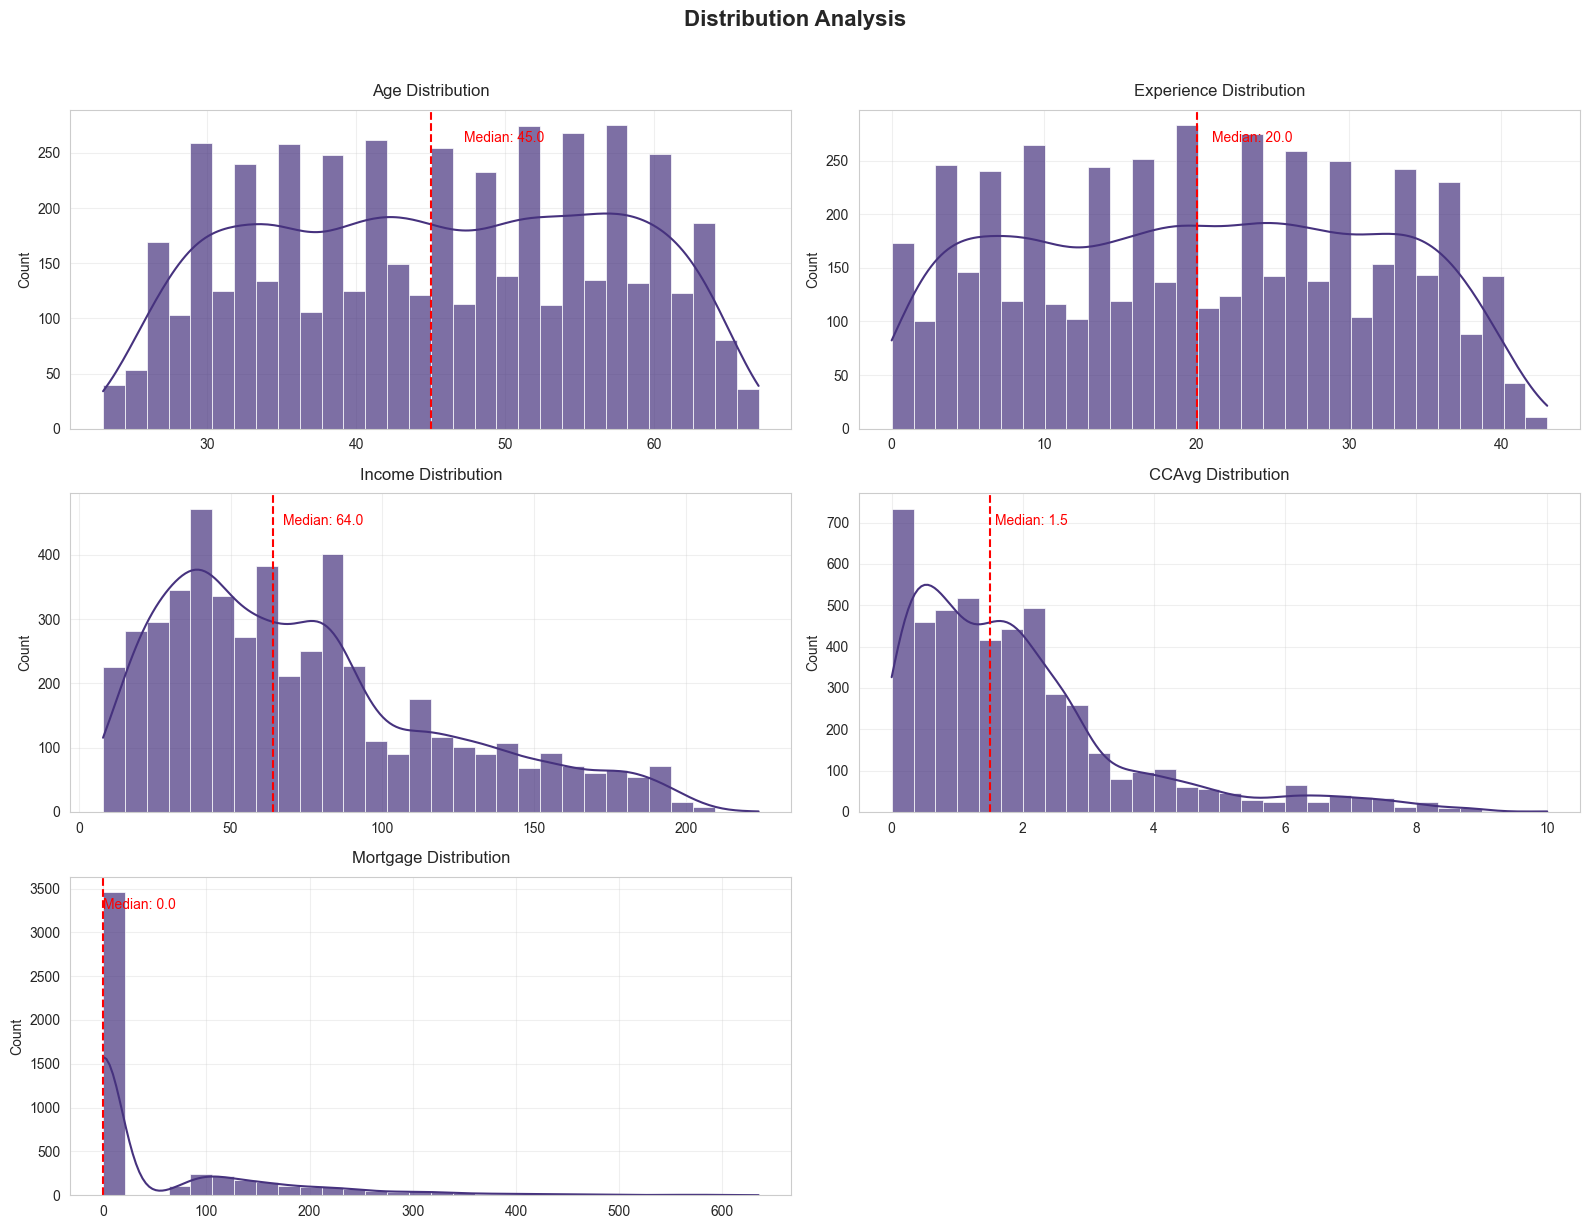

In [32]:
# Plot Histograms for numerical variables
numerical = ["Age", "Experience", "Income", "CCAvg", "Mortgage"]
fig = plot_numerical_distributions(data, numerical)

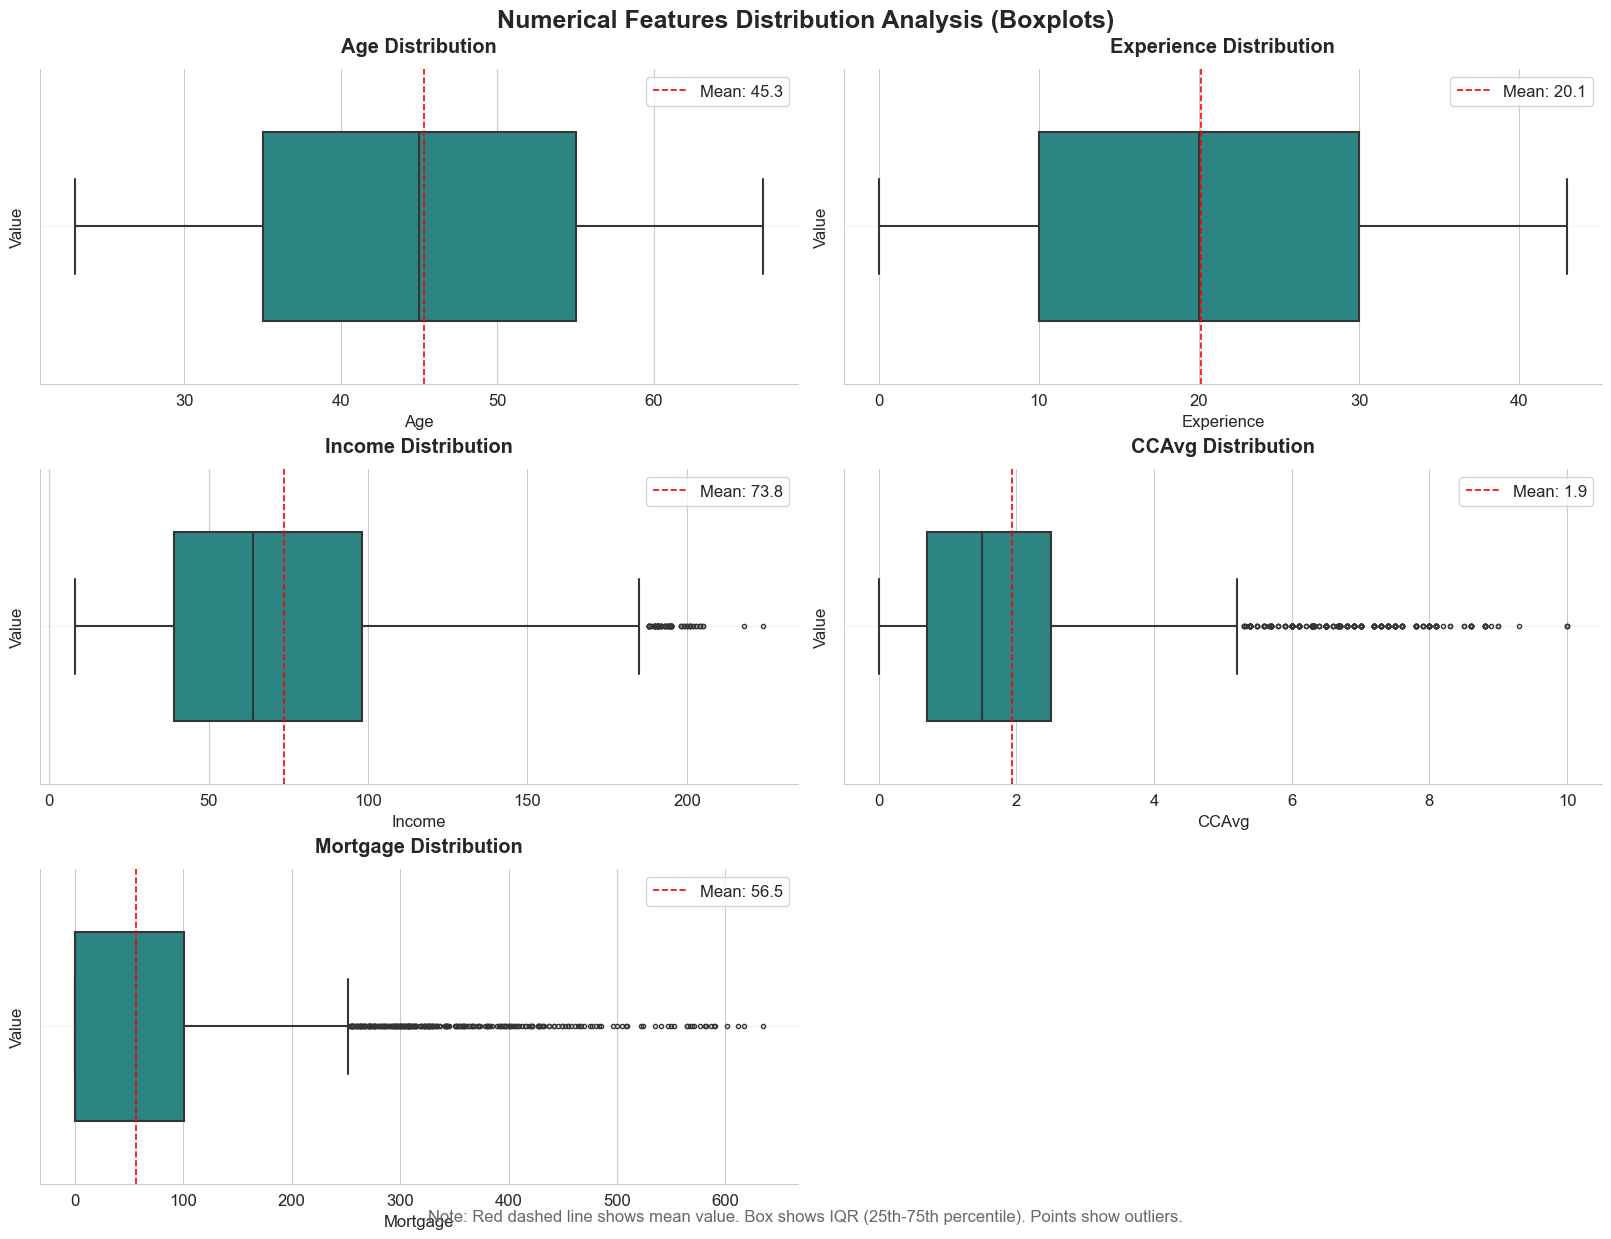

In [33]:
# Plot boxplots for numerical variables

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fig = plot_numerical_boxplots(data=data, numerical_features=numerical)
    plt.show()

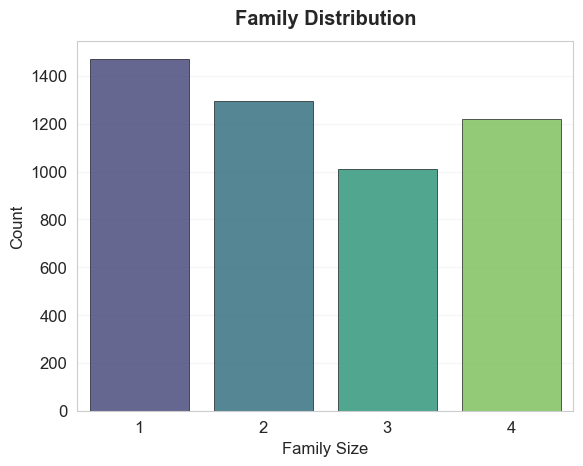

In [34]:
# Countplot for Family variable
sns.countplot(data=data, x="Family", palette="viridis", edgecolor='black', linewidth=0.5, alpha=0.85, stat='count') 
plt.title("Family Distribution", pad=12, fontweight='semibold')
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(visible=True, alpha=0.2, axis='y')
plt.show()

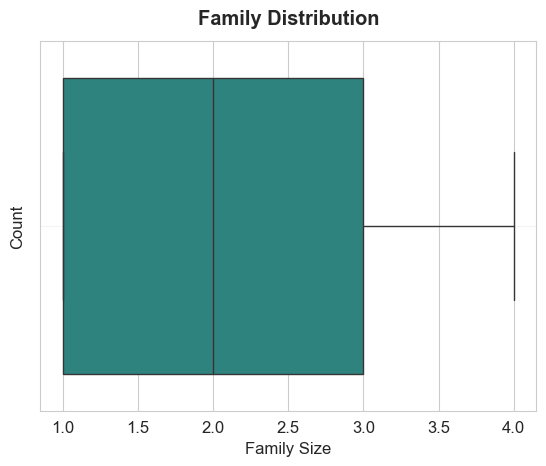

In [35]:
# Boxplot for Family variable
sns.boxplot(data=data, x="Family", palette="viridis") 
plt.title("Family Distribution", pad=12, fontweight='semibold')
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(visible=True, alpha=0.2, axis='y')
plt.show()

### Univariate Analysis Observations (Numerical Variables)

---
#### Age Distribution
* The histogram shows three slight peaks, around 30 years old, 42 years old and 57 years old.  This might indicate 3 distingt age groups. 
* The range is 23 to 67 years old.
* The mean is 45.33 years old and the median is 45 years old. Both are very close together. 
* Q1 is 35 years old. (25% percentile)
* Q3 is 55 years old. (75% percentile)
* There are no outliers. 

#### Experience Distribution
* The histogram shows three slight peaks around 7, 20 and 35 years of experience. Appears to be a very uniform distribution. 
* The range goes from 0 to 43 years of experience.
* The mean is 20.13 years of expereinece and the median is 20 years of exprience. Both are very close together. 
* Q1 is 10 years of experience. (25% percentile)
* Q3 is 30 years of experience. (75% percentile)
* There are no otliers.

#### Income Distribution

* The histogram is right skewed, with most having an income below $100,000 USD a year. There is a peak around $45,000 USD and a slight peak around $80,000 USD.
* The range goes from $8,000 to $224,000 USD of yearly income.
* The mean is $73,774 USD of yearly income
* The median is $ $64,000 USD of yearly income. The mean has a significant difference generated by High income outliers. 
* Q1 is $39,000 USD (25% percentile)
* Q3 is $98,000 USD. (75% percentile)
* There are several high income outliers.

#### Credit Card Spending Average

* The histogram is right skewed, with a big peak around $1,000 USD of monthly spending. Most individuals have a low spending. 
* The range goes from zero to $10,000 USD of monthly spending. 
* The mean is $1,938 USD monthly.
* The median is $1,500 USD monthly. The mean is affected by high spending outliers. 
* Q1 is $700 USD. (25% percentile)
* Q3 is $2,500 USD. (75% percentile)
* There are several high spending outliers. spending above $5,500 USD monthly.

### Mortgage Distribution

* The histogram is also right skewed, with a strong peak at zero. This suggest that a vast number of customers don't have a mortgage.
* The customers that do have a mortgage there is a peak at $100,000 USD. 
* The mean is $56,500 and the median is zero. This is affected by the large number of customers that do not have a mortgage.
* The range goes from zero to $635,000.
* Q1 and Q2 are 0. (25% and 50% percentile)
* Q3 is $101,000. (75% percentile)
* There are several outliers with mortgage above $250,000 and extending up to $635,000.

#### Family Size Distribution
* The family sizes are quite balanced. A size of 1 is the most common with 1472 customers, followed by size 2 with 1296 customers. 
* We can imply that most customers are single or couples. 
---

### Categorical Variables Frequencies

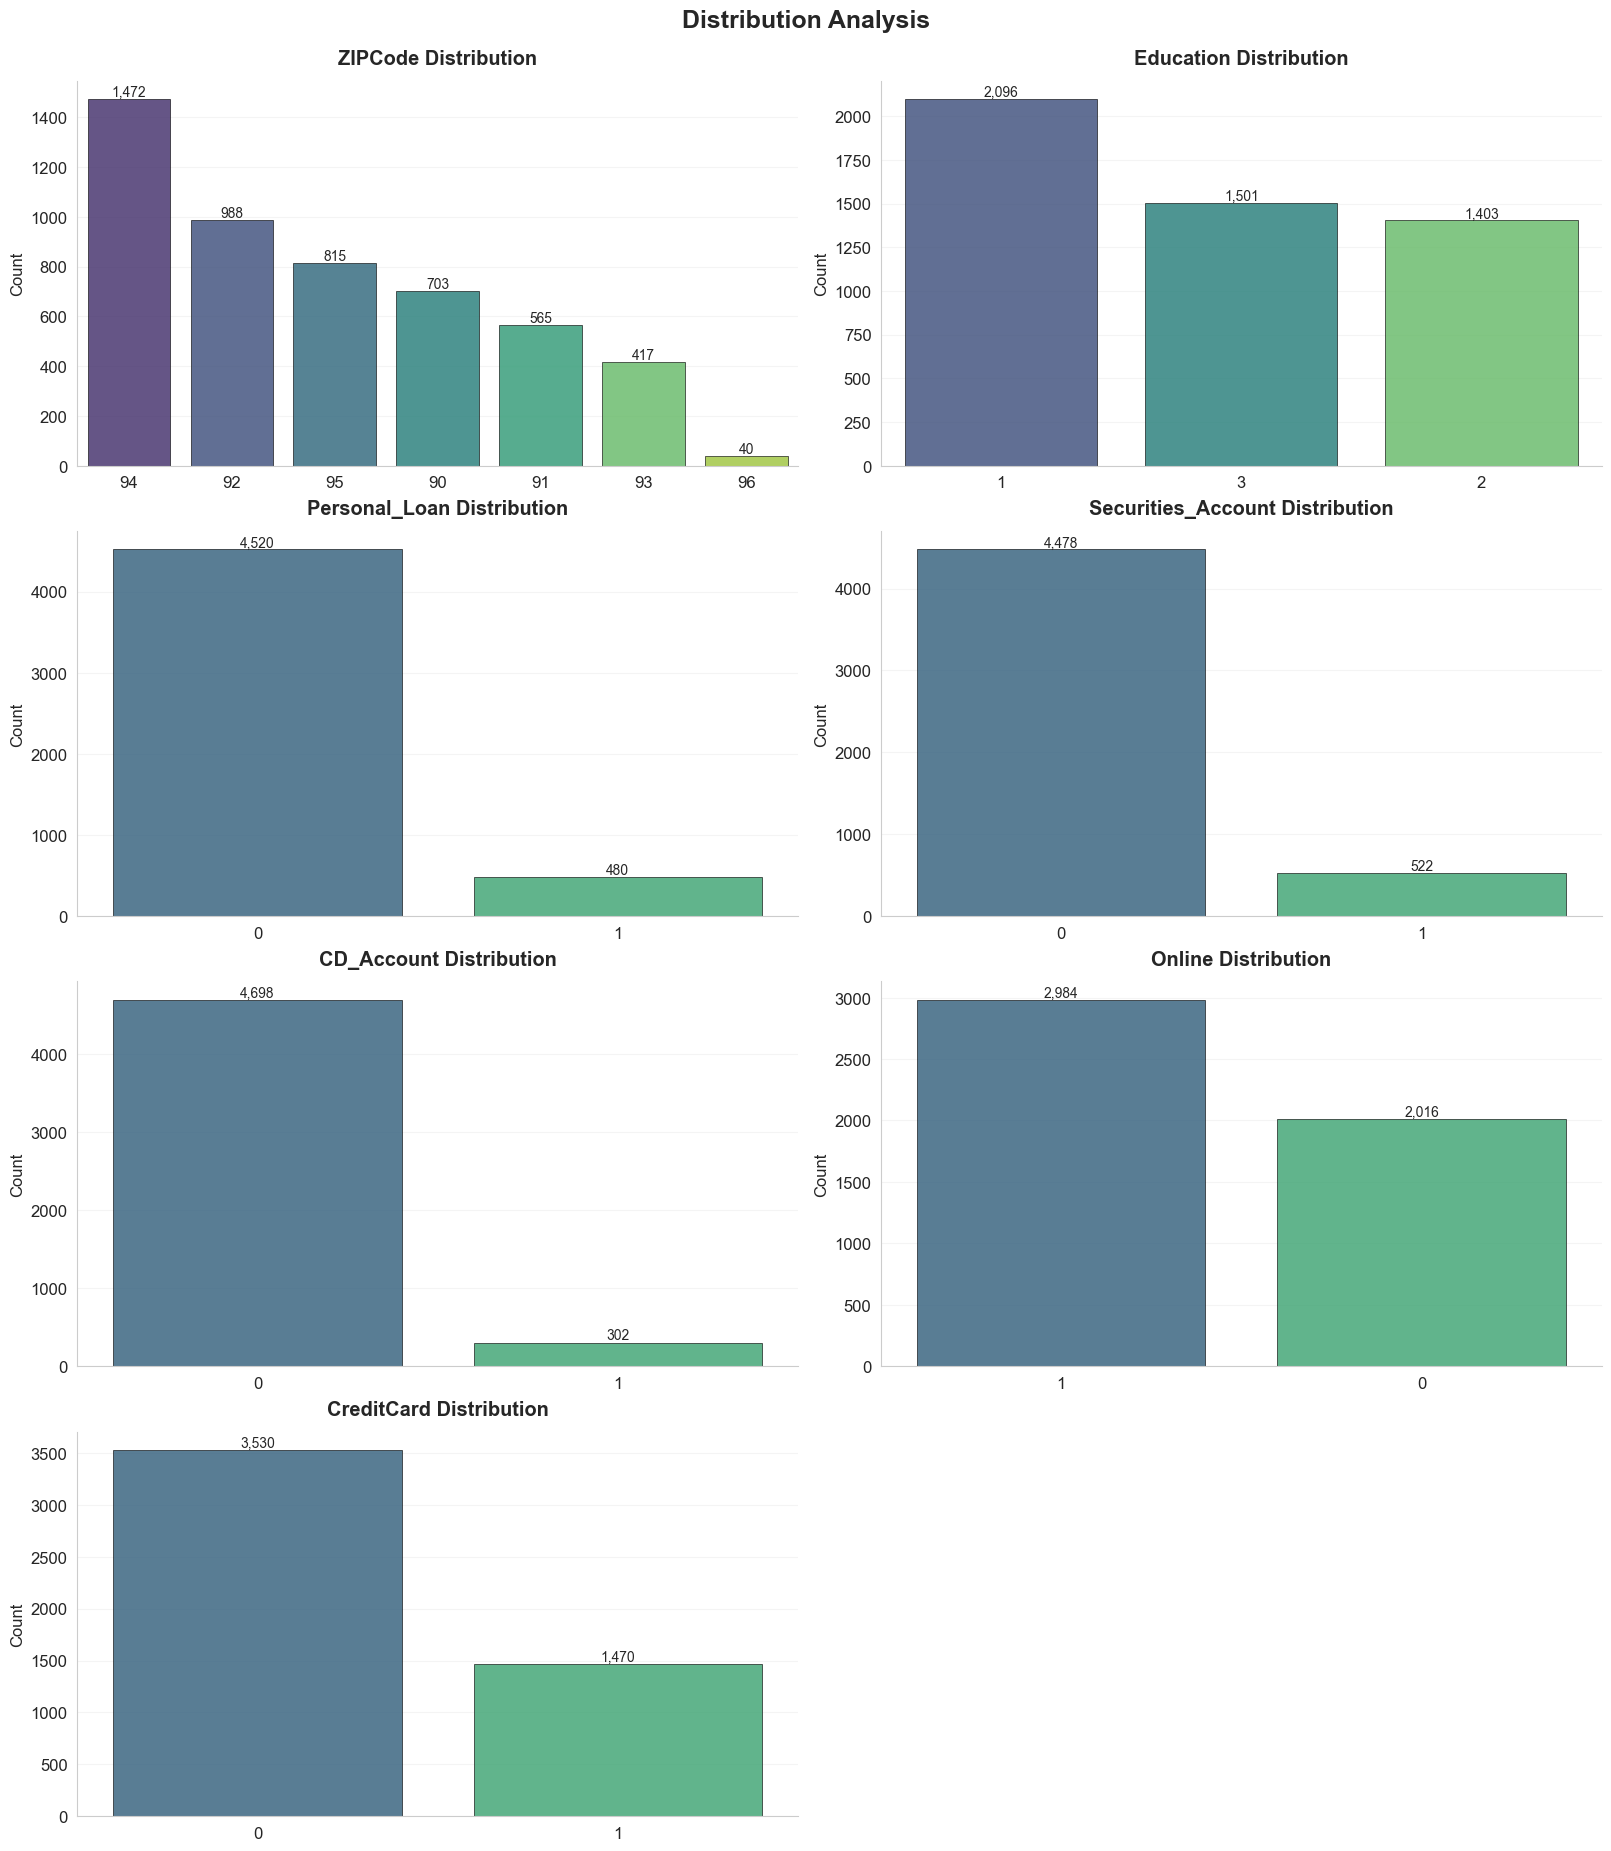

In [36]:
# Barplots for categorical variables
categorical = ["ZIPCode", "Education", "Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard",]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fig = plot_categorical_distributions(data, categorical)
    plt.show()

### Univariate Analysis Observations (Categorical Variables)

---
#### Zip Code Distribution
* Zip Code 94 has he highest count with 1,472 customers, followed by Zip Code 92 with 968 customers and Zip Code 95 with 815 customers. 
* There is a concentration of customers in Zip codes 94, 92 and 95.

#### Education Distribution
* Undergraduate level is the most common with 2096 customers, followed by Advance Professionals with 1501 customers and Graduate with 1403 customers. 
* In the Bivarate Analysis, will be important to compare education with income and see if there is a correlation. 

#### Personal Loan Distribution
* 4520 customers (90%)  didn't accept the last personal loan campaign. Only 480 customers (10%) accepted the campaign. 

#### Personal Loan Distribution
* 4520 customers (90%)  didn't accept the last personal loan campaign. Only 480 customers (10%) accepted the campaign. 

#### Certificate Deposit Distribution
* 302 customers have a CD Account, while 4698 customers do not.

#### Online Banking
* 2984 customers(60%) use online banking, 2016 customers (40%) do not use Online Banking.

#### Credit Card
* 1,470 customers(29%) have a credit card from anothe bank, while 3,550 customers (71%) do not have a credit card from another bank.
---

## Bivariate Analysis

### Relationship Analysis

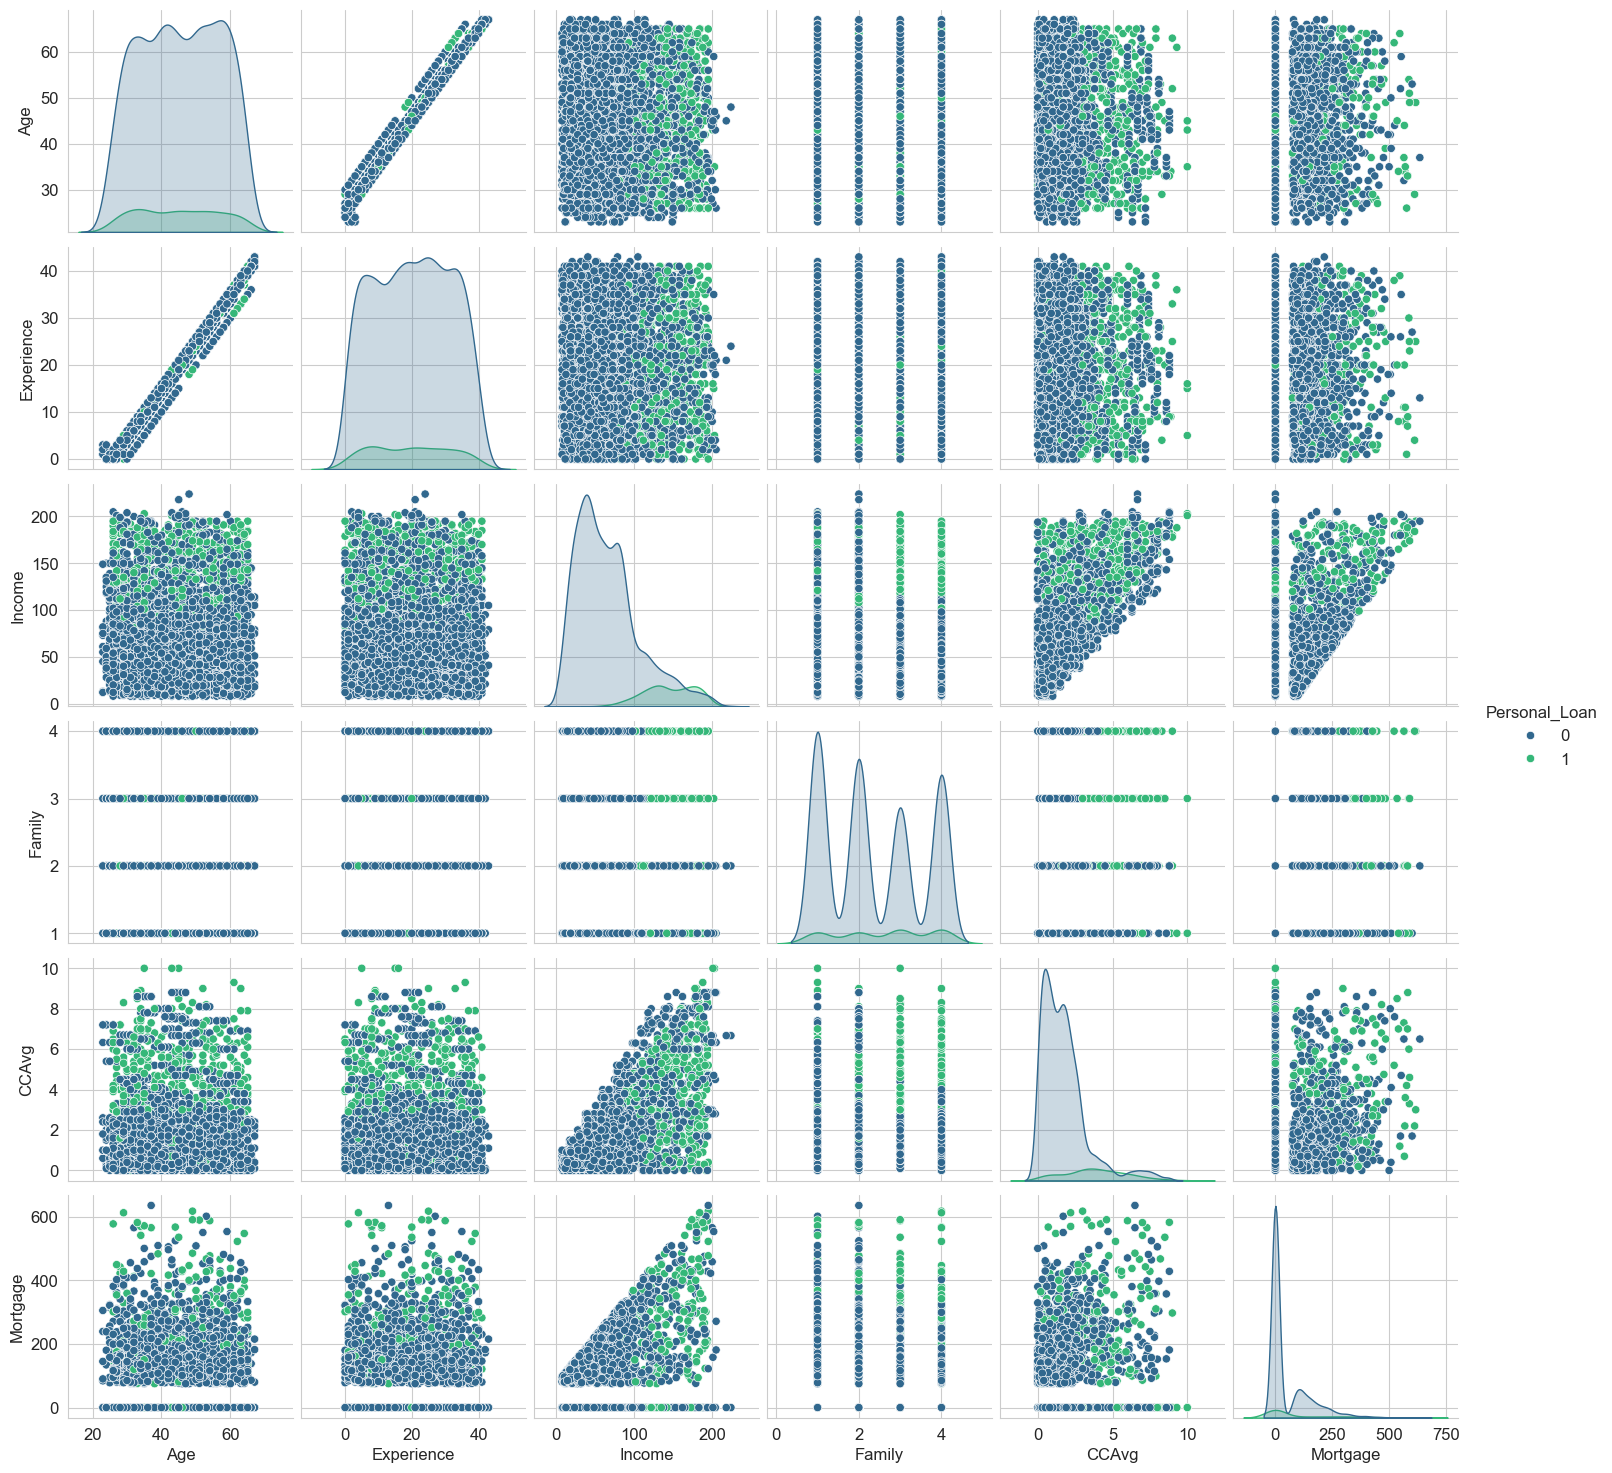

In [37]:
# Understand the distribution of the numerical data.
sns.pairplot(data, hue="Personal_Loan", diag_kind="kde", palette="viridis", height=2.5)
plt.show()

#### Pairplot Observations
* Age and Experience have a strong linear correlation. As seen in the scatterplot. 
* Income and Mortgage have a positive correlation. Higher income tend to have higher mortgages. 
* Higher credit card spenders ar more likely to accept a personal loan. 
* People under 40 are less likely to take a personal loan. 
* Income and Credit Card spending, seem to be the strongest predictors for a customer to accept a loan. 
---

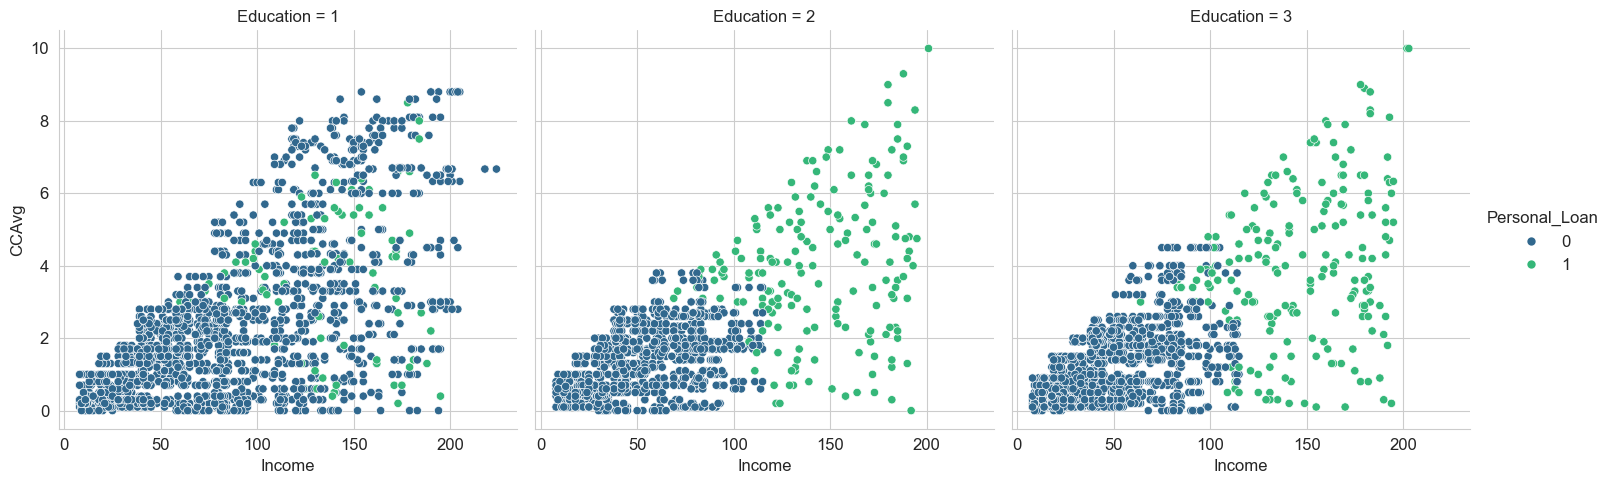

In [38]:
# Observe the suspected strongest predictors distribution against Education.
sns.relplot(x="Income", y="CCAvg", hue="Personal_Loan", col="Education", data=data, palette="viridis");

#### Relationship Income VS CCAvg by Education
* Higher income and higher spenders have a positive correlation. 
* More educated customers are more likely to accept a personal loan, when having a high income and high credit card spending. 
* High income and High spenders with that are Graduated or Advance professionals are very likely to accept a personal loan. 

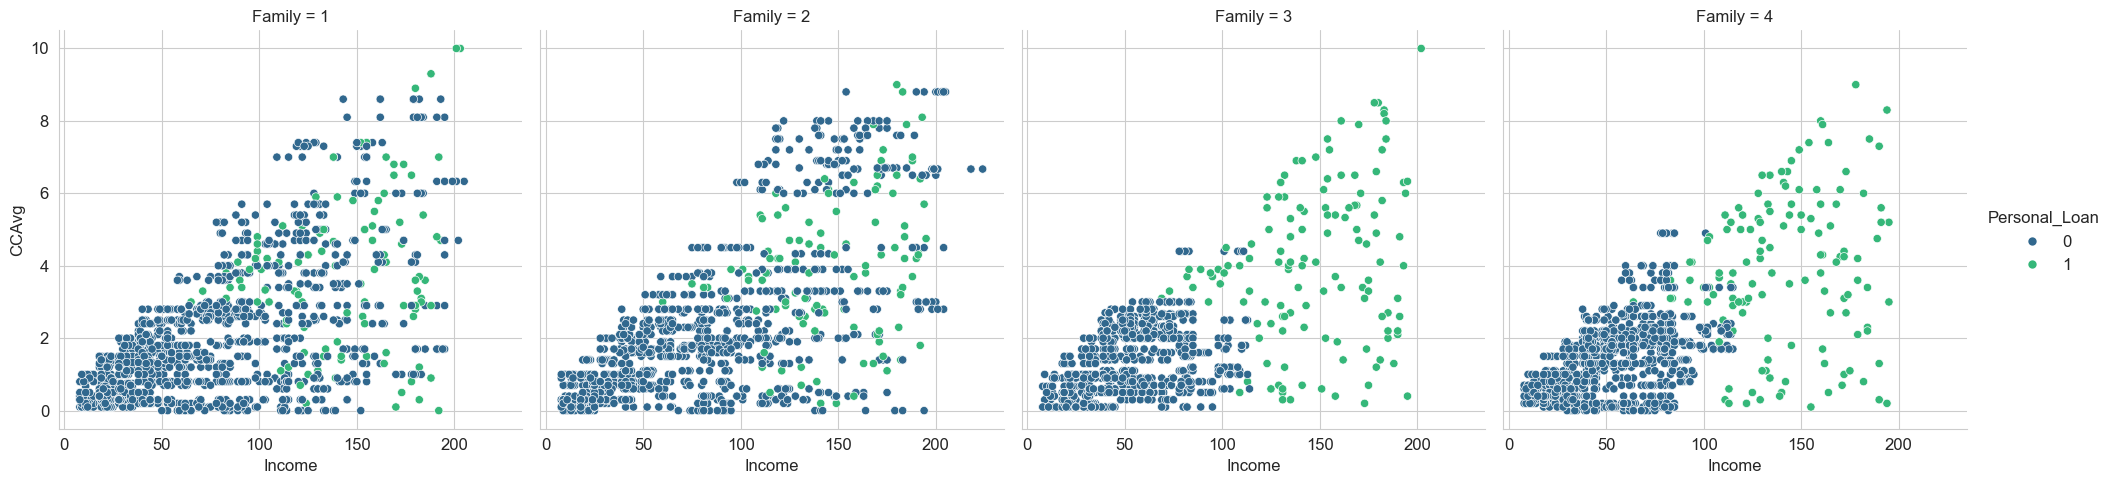

In [39]:
sns.relplot(x="Income", y="CCAvg", hue="Personal_Loan", col="Family", data=data, palette="viridis");

#### Relationship Income vs CCAvg by Family Size
* High Income and High spending customers with families above 3 are more likely to accept a personal loan. 

### Correlation

In [40]:
# Generate a correlation matrix
data.corr(numeric_only=True)

Age  Experience    Income    Family     CCAvg  Mortgage
Age         1.000000    0.993991 -0.055269 -0.046418 -0.052012 -0.012539
Experience  0.993991    1.000000 -0.046876 -0.051851 -0.049738 -0.011097
Income     -0.055269   -0.046876  1.000000 -0.157501  0.645984  0.206806
Family     -0.046418   -0.051851 -0.157501  1.000000 -0.109275 -0.020445
CCAvg      -0.052012   -0.049738  0.645984 -0.109275  1.000000  0.109905
Mortgage   -0.012539   -0.011097  0.206806 -0.020445  0.109905  1.000000

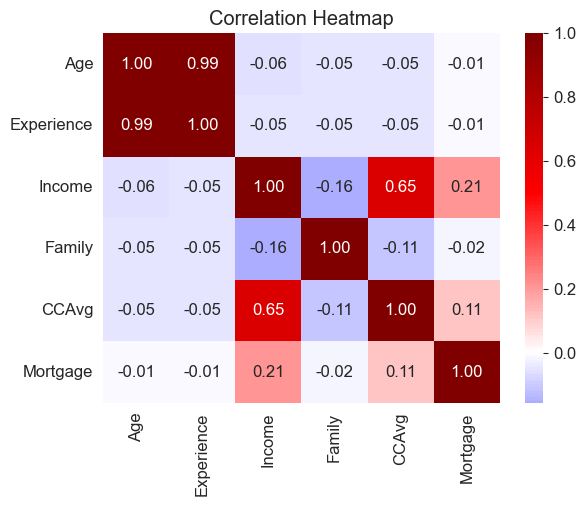

In [41]:
# Plot the correlation matrix
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="seismic", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Correlation Observation
* As seen in the pairplot the relationship between age and exprience is very high, having a 0.99 correlation. 
* There is a positive correlation between CCAvg and Income with 0.65
* Mortgage and income have a slight positive correlation at 0.21
---

### Bivariate Analysis Observations (Dependent Variable: Personal Loan)

Analyzing how categorical and numerical features interact with **Personal Loan** reveals critical insights into loan adoption patterns.

---

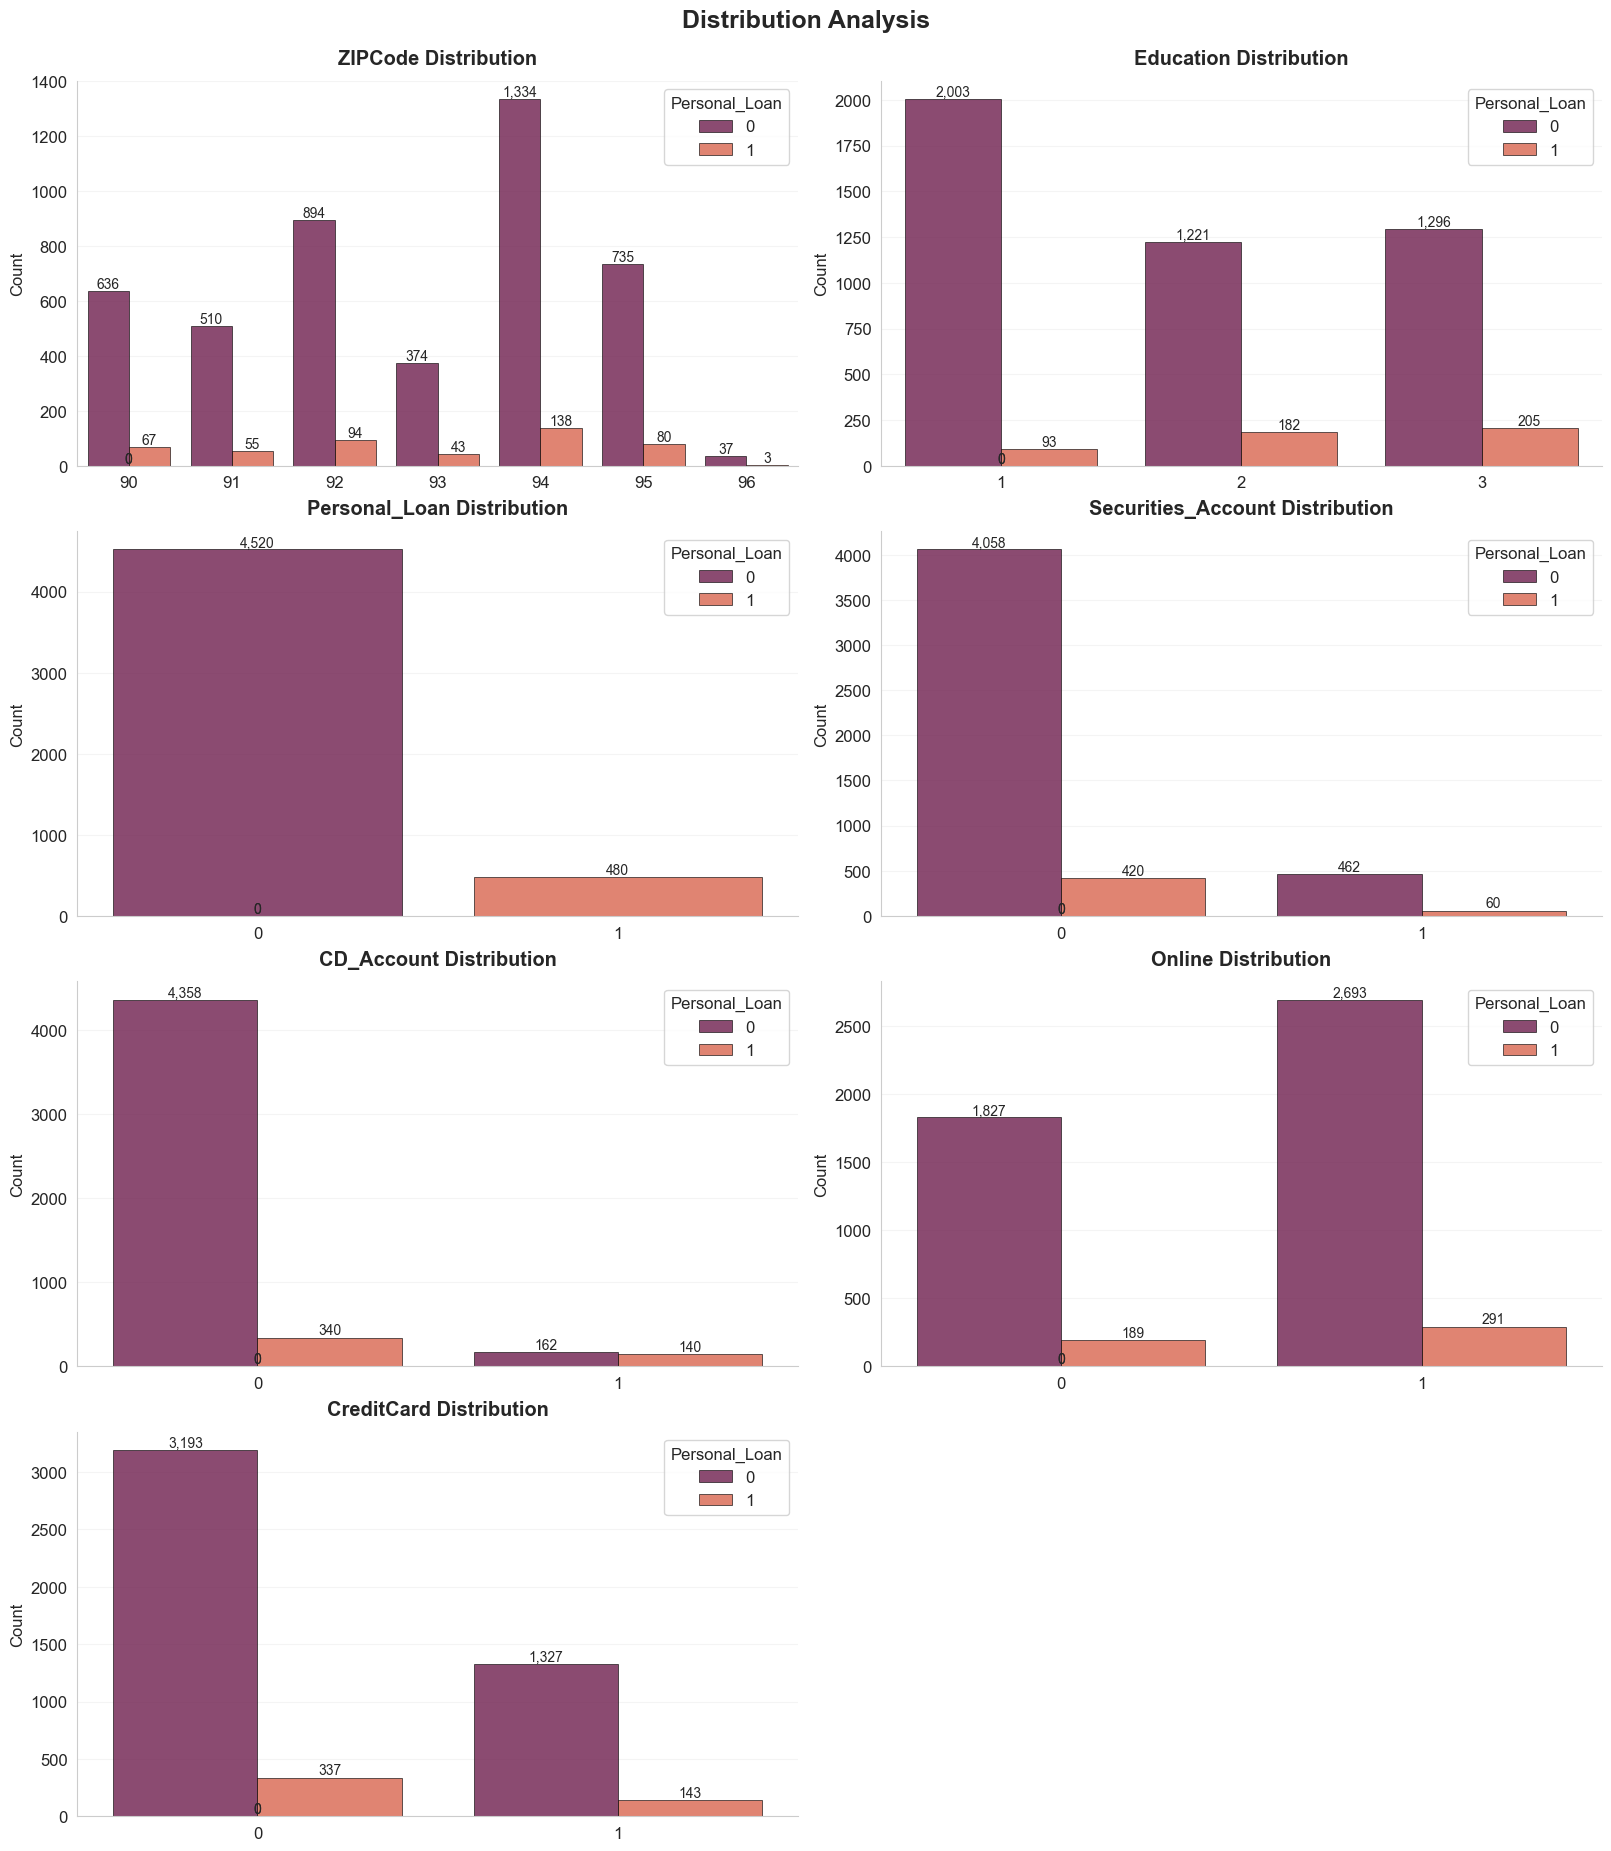

In [42]:
# Plot the frequency of the Personal Loan vs categorical variables
fig = plot_categorical_distributions(data, categorical, hue="Personal_Loan", palette="rocket")
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.show();

##### Categorical Variables vs. Personal Loan

**Education Level & Personal Loan**
* Advance Professionals have the highest loan adoption rate (13.7%), while Undergraduate customers have the lowest (9.8%).

**Securities Account & Personal Loan**
* Individuals with a securities account are less likely to take a loan (loan adoption rate: 10.3%). 

**CD Account & Personal Loan**
* Individuals with a CD account have a significantly higher loan adoption rate (32.6%), compared to those without (9.1%).

**Online Banking & Personal Loan**
* Online banking users have a higher loan adoption rate (10.9%), compared to non-users (8.5%).

**Credit Card Ownership & Personal Loan**
* Customers with credit cards from other banks have lower loan adoption (8.9%), compared to those without (11.5%).
---

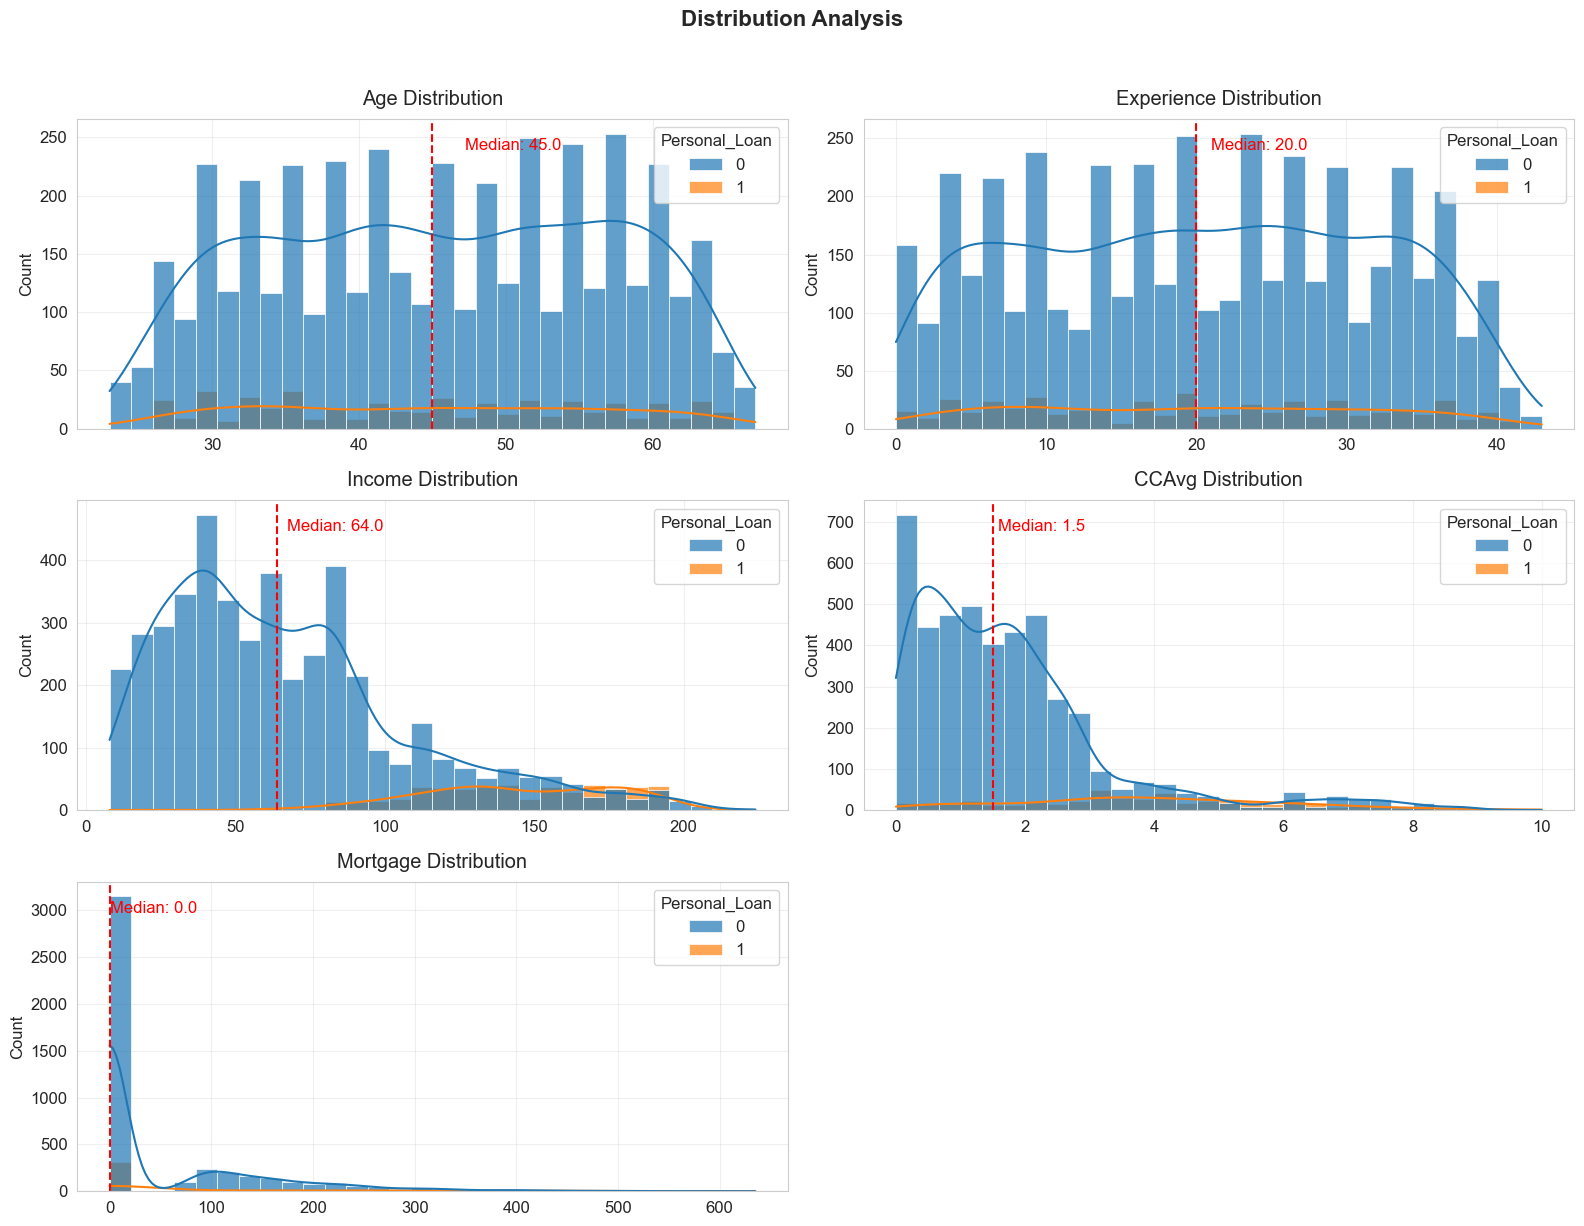

In [43]:
# Plot the distribution of Personal Loan vs numerical variables
custom_palette = ['#33FF57','#5733FF','#FF5733']
fig = plot_numerical_distributions(data, numerical, hue="Personal_Loan", palette="tab10")

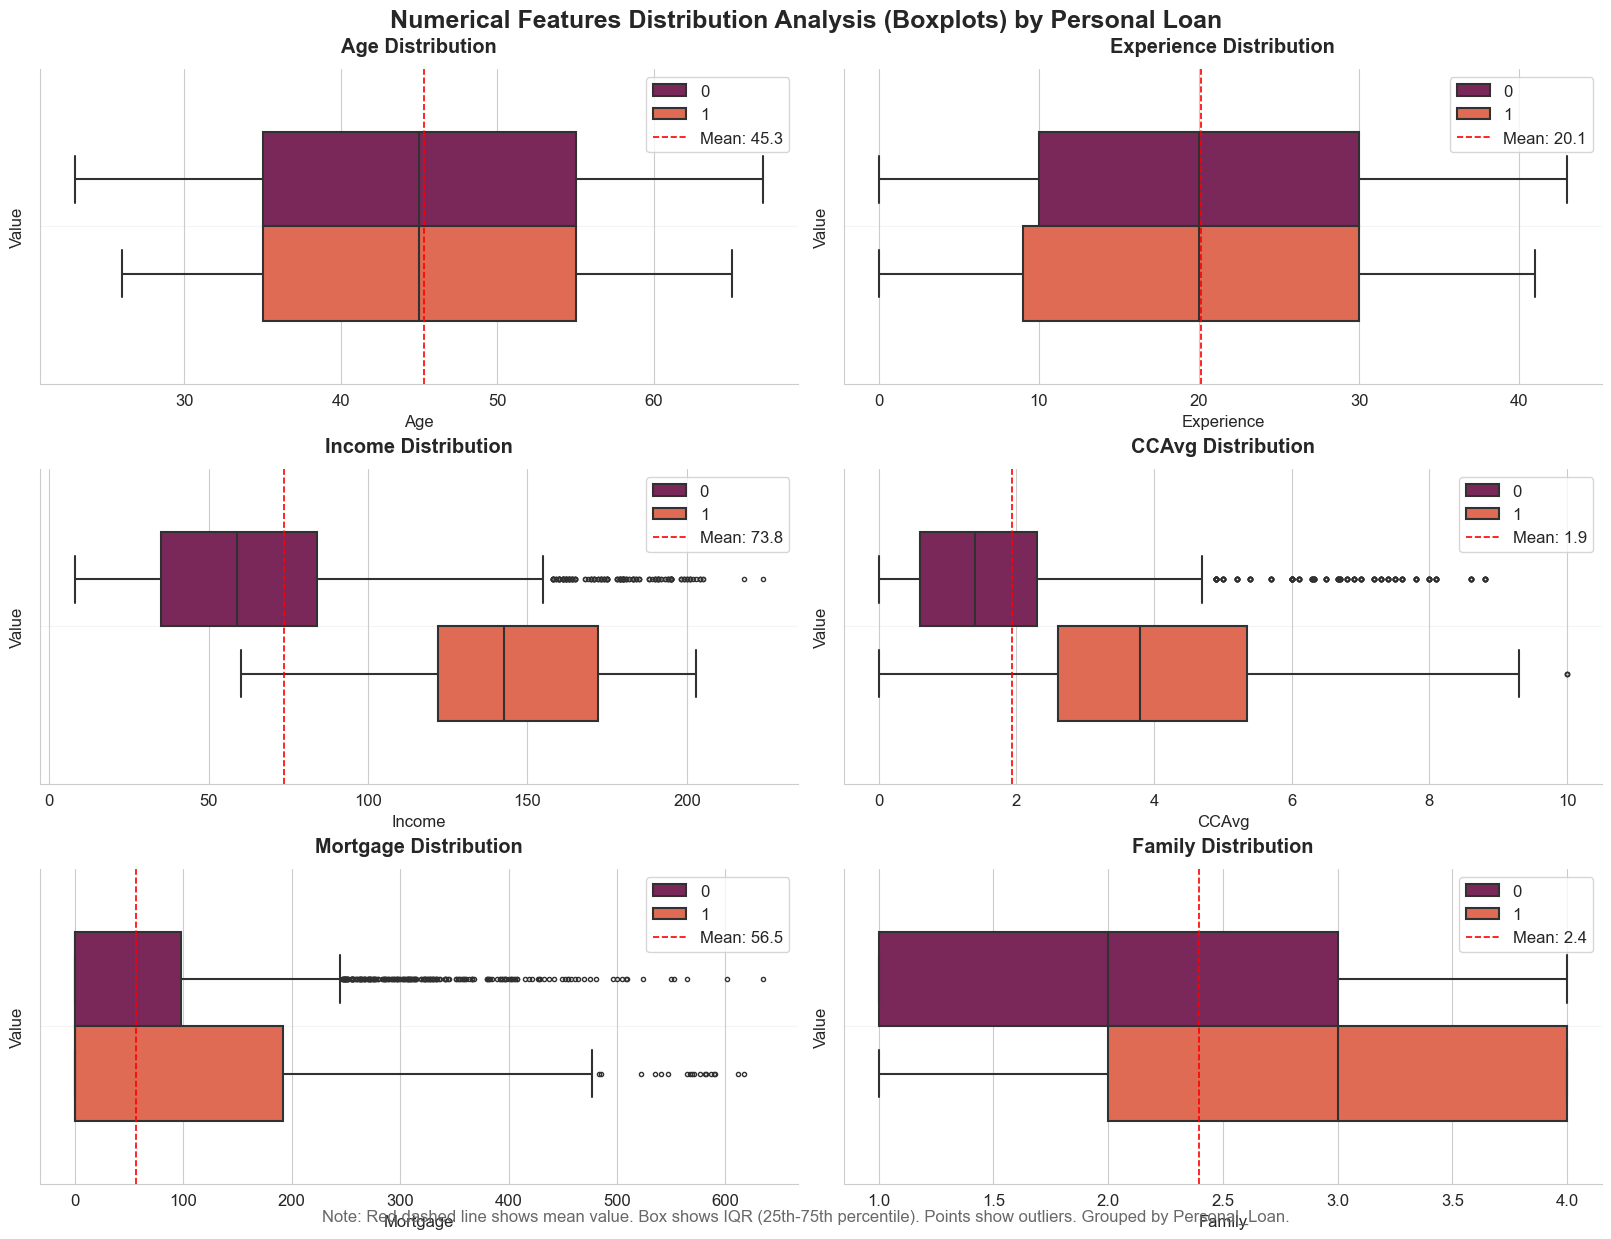

In [44]:
# Plot boxplots for numerical variables
fig = plot_numerical_boxplots(data=data, numerical_features=numerical + ["Family"], hue="Personal_Loan", palette="rocket");
plt.suptitle('Numerical Features Distribution Analysis (Boxplots) by Personal Loan', fontsize=18, fontweight='bold', y=1.02)
plt.show()

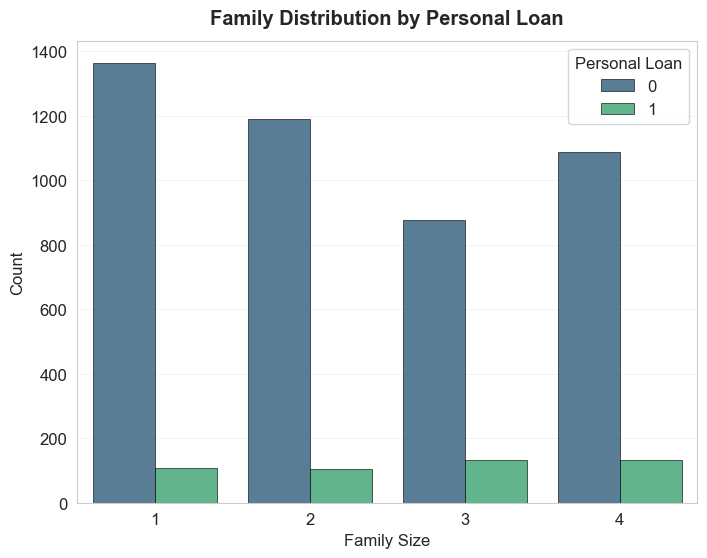

In [45]:
# Family vs Personal Loan
fig = plt.figure(figsize=(8, 6), dpi=100)  
sns.countplot(data=data, x="Family", hue="Personal_Loan", palette="viridis", edgecolor='black', linewidth=0.5, alpha=0.85, stat='count')
plt.title("Family Distribution by Personal Loan", pad=12, fontweight='semibold')
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(visible=True, alpha=0.2, axis='y')
plt.legend(title="Personal Loan", loc='upper right')
plt.show()

##### Numerical Variables vs. Personal Loan  

**Age & Personal Loan**  
* Median Age: 45.0 
* The age distribution appears fairly symmetric, with individuals ranging between 20 and 70 years old.  
* The boxplot shows no difference between customers that accepted a personal loan and those that didn't. 

**Experience & Personal Loan**  
* Median Experience: 20.0 years.   
- The boxplot shows no difference between customers that accepted a personal loan and those that didn't. 

**Income & Personal Loan**  
* Median Income: 64.0**  
* The income histogram indicates a right-skewed distribution, with the majority of individuals earning below 100K.  
* The boxplot shows that customers that took a loan generally have higher incomes.

**Credit Card Average (CCAvg) & Personal Loan**  
* Median CCAvg: 1.5  
* The boxplot confirms that loan adopters tend to have higher Credit Card Spending.

**Mortgage & Personal Loan**  
* Median Mortgage: 56.5   
* The boxplot shows that customers without a mortgage still take loans.

**Family Size & Personal Loan**
* Loan adoption increases with larger family sizes.  
* Family size 4 has the highest loan adoption rate at 11.2%
---

#### Key Takeaways
- **Education, family size, and CD accounts are strong categorical predictors** of loan adoption.
- **Income and CCAvg are highly correlated with loan adoption**, suggesting financial flexibility drives borrowing.
- **Mortgage has moderate influence**, with no clear separation between mortgage holders and non-holders.
- **Credit card ownership appears to reduce reliance on personal loans**, while **online banking increases loan adoption**.
- **Income and CCAvg are the strongest numerical predictors** of personal loan adoption.  
- **Age and Experience have little impact**, as their distributions remain stable across loan statuses.  
- **Mortgage has extreme outliers**, but the boxplot confirms that loan adoption is not necessarily tied to mortgage size.  

## Responses to Analysis Questions

---
**1. What is the distribution of the mortgage attribute? Are there any noticeable patterns or outliers in the distribution?**  
* The mortgage attribute exhibits a right-skewed distribution, with most individuals having a mortgage value of 0.  
* The median mortgage value is 56.5, but the presence of several extreme outliers above $600,000 suggests significant variability in mortgage amounts.  
* While some customers hold large mortgages, the majority do not have one. 

**2. How many customers have credit cards?**  
* 1,470 customers have credit cards, while 3,550 do not.  
* Only 29.3% of individuals own a credit card from another bank.  

**3. What are the attributes that have a strong correlation with the target attribute (personal loan)?**   
* Income: Higher-income individuals are more likely to take loans.  
* Credit Card Average Spending: Increased credit card spending correlates with higher loan adoption.   
* Higher education levels, larger family size, and online banking usage are more likely to accept a personal loan.  

**4. How does a customer's interest in purchasing a loan vary with their age?**  
* Age distribution remains similar between customers that accepted and didn't accept the las personal loan campaign.   
* The median age of customers that accepted a personal loan is around 45 years old. 
* Age alone is not a good predictor for a customer to accept a personal loan.

**5. How does a customer's interest in purchasing a loan vary with their education?**  
* Advance Professionals have the highest personal loan rate (13.7%), while undergraduate customers have the lowest (9.8%).  
* The higher the education of a customer, more likely is to accept a personal loan. 
---

# 5 - Data Preprocessing

## Missing value treatment

In [46]:
# checking for null values
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

The data has no missing values.

## Outlier Detection

---
During the EDA the Boxplot revelead Outliers in Income, CCAvg and Mortage.

In [47]:
results = []
outlier_columns = ["Income", "CCAvg", "Mortgage"]


for col in outlier_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    # Store results
    results.append({
        'Column': col,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': len(outliers),
        'Outlier Percentage (%)': (len(outliers) / len(data)) * 100,
    })

outlier_df = pd.DataFrame(results)
outlier_df

Column  Lower Bound  Upper Bound  Outlier Count  Outlier Percentage (%)
0    Income        -49.5        186.5             96                    1.92
1     CCAvg         -2.0          5.2            324                    6.48
2  Mortgage       -151.5        252.5            291                    5.82

#### Outlier Observations
---
* **Income and Credit Card Average Spending**: The decision is that this outliers represent High Income Customers or High Spenders. Which represent an identifiable and very desirable group of people. So it is important for the model to keep this customers. 
* **Mortgage**: Customers with a Mortgage are very desirable for other kind of credit and loans. Nevertheless the value of the Mortgage might not give any further detail to predict the aquisition of a Personal Loan. This variable might have been better represented as a binary variable. Customer has a Mortgage (Yes, No). But for risk assessment mighrt be important if a customer has a high Mortgage if the customer gets a Personal Loan he might overextend his ability to pay and default. So we it has been decided to keep Morgage outliers. 

## High Correlated Variables (Age & Experience)
---
During the Correlation analysis this two variables are correlated 99%. In this case one of this variables can be dropped in order to simplify the model without loosing meaningful information. Age is better suited as it provides better information of the customer. 

In [48]:
# Drop Experience column
data = data.drop(columns=["Experience"], axis=1)
data

Age  Income ZIPCode  Family  CCAvg Education  Mortgage Personal_Loan  \
0      25      49      91       4    1.6         1         0             0   
1      45      34      90       3    1.5         1         0             0   
2      39      11      94       1    1.0         1         0             0   
3      35     100      94       1    2.7         2         0             0   
4      35      45      91       4    1.0         2         0             0   
...   ...     ...     ...     ...    ...       ...       ...           ...   
4995   29      40      92       1    1.9         3         0             0   
4996   30      15      92       4    0.4         1        85             0   
4997   63      24      93       2    0.3         3         0             0   
4998   65      49      90       3    0.5         2         0             0   
4999   28      83      92       3    0.8         1         0             0   

     Securities_Account CD_Account Online CreditCard  
0                     1          0      0          0  
1                     1          0      0          0  
2                     0          0      0          0  
3                     0          0      0          0  
4                     0          0      0          1  
...                 ...        ...    ...        ...  
4995                  0          0      1          0  
4996                  0          0      1          0  
4997                  0          0      0          0  
4998                  0          0      1          0  
4999                  0          0      1          1  

[5000 rows x 12 columns]

## Dummy Variables
---

In [49]:
# List categorical columns
print(categorical)

['ZIPCode', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


From the categorical values it is needed to decide which ones require dummy variables:
* Personal Loan is the dependent variable. No need for dummy variables. 
* Securities Account, CD_Account, Online and Credit Card. Are binary variables. No need for dummy variables.
* Education, it represents 3 categories. Dummy variables are needed.
* ZIPCode, it represents 7 regions. Dummy variables are needed.

In [50]:
# Create dummy variables for ZIPCode and Education
data_dummy = pd.get_dummies(data, columns=["ZIPCode", "Education"], drop_first=True)
data_dummy.head()

Age  Income  Family  CCAvg  Mortgage Personal_Loan Securities_Account  \
0   25      49       4    1.6         0             0                  1   
1   45      34       3    1.5         0             0                  1   
2   39      11       1    1.0         0             0                  0   
3   35     100       1    2.7         0             0                  0   
4   35      45       4    1.0         0             0                  0   

  CD_Account Online CreditCard  ZIPCode_91  ZIPCode_92  ZIPCode_93  \
0          0      0          0        True       False       False   
1          0      0          0       False       False       False   
2          0      0          0       False       False       False   
3          0      0          0       False       False       False   
4          0      0          1        True       False       False   

   ZIPCode_94  ZIPCode_95  ZIPCode_96  Education_2  Education_3  
0       False       False       False        False        False  
1       False       False       False        False        False  
2        True       False       False        False        False  
3        True       False       False         True        False  
4       False       False       False         True        False

## Train and Test
---
In the Constant Definitions, The test size was defined as .20 and the Random Seed as 42.

In [51]:
# Define Features and Target
X = data_dummy.drop(columns=["Personal_Loan"], axis=1)
y = data_dummy["Personal_Loan"]

In [52]:
# Observe features
X.head()


Age  Income  Family  CCAvg  Mortgage Securities_Account CD_Account Online  \
0   25      49       4    1.6         0                  1          0      0   
1   45      34       3    1.5         0                  1          0      0   
2   39      11       1    1.0         0                  0          0      0   
3   35     100       1    2.7         0                  0          0      0   
4   35      45       4    1.0         0                  0          0      0   

  CreditCard  ZIPCode_91  ZIPCode_92  ZIPCode_93  ZIPCode_94  ZIPCode_95  \
0          0        True       False       False       False       False   
1          0       False       False       False       False       False   
2          0       False       False       False        True       False   
3          0       False       False       False        True       False   
4          1        True       False       False       False       False   

   ZIPCode_96  Education_2  Education_3  
0       False        False        False  
1       False        False        False  
2       False        False        False  
3       False         True        False  
4       False         True        False

In [53]:
# Observe target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: category
Categories (2, int64): [0, 1]

In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RS, stratify=y)

In [55]:
# Observe the shape of the training and testing sets
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (3500, 17)
X_test: (1500, 17)
y_train: (3500,)
y_test: (1500,)


# 6 - Model Building

## Model Evaluation Criterion

### Recall

The business wants to maximaize the conversion of customers to borrowers. Therefore it is needed to reduce the number of False Negatives (Customers predicted that wouldn't accept a loan, but actually did). Recall will be used as the model evaluation criteria. 

#### Functions for model evaluation
---
Function that return a dataframe with performance metrics (Accuracy, Recall, Precision and F1). 
Imported from the Hands On Decision Tree Notebook.


In [56]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

Function that returns the Confussion Matrix

In [57]:
def plot_confussion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

## Model Building

In [58]:
# Decision Tree Classifier
first_tree = DecisionTreeClassifier(random_state=RS)
# Fit the model
first_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [59]:
# Evaluate the model on the training set
first_tree_train_performance = model_performance_classification(first_tree, X_train, y_train)
print("Train Performance")
print(first_tree_train_performance)
# Evaluate the model on the testing set
first_tree_test_performance = model_performance_classification(first_tree, X_test, y_test)
print("Test Performance")
print(first_tree_test_performance)

Train Performance
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Test Performance
   Accuracy    Recall  Precision        F1
0  0.981333  0.861111   0.939394  0.898551


#### Observation:
* The test performance has lower performance compared to the train performance. Mostly because it is a full tree that overfitts the training set. 
* All the evaluation scores perform lower, specially F1 score. 

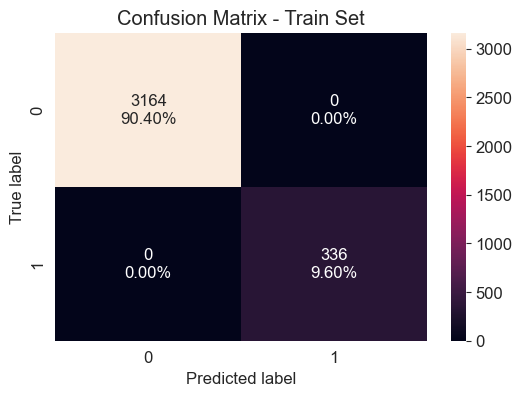

In [60]:
# Plot the confusion matrix for the training set
plot_confussion_matrix(first_tree, X_train, y_train)
plt.title("Confusion Matrix - Train Set")
plt.show()

#### Observation:
* False Negatives and False Positives are zero. This might indicate overfitting. 

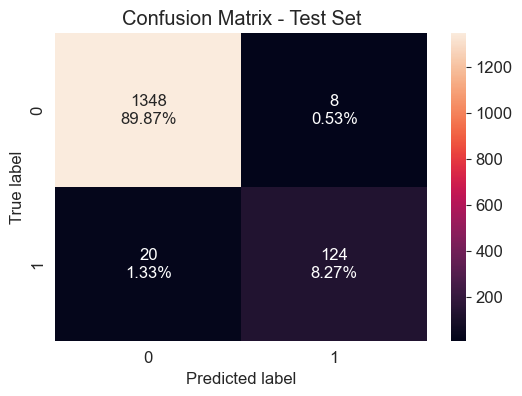

In [61]:
# Plot the confusion matrix for the testing set
plot_confussion_matrix(first_tree, X_test, y_test)
plt.title("Confusion Matrix - Test Set")
plt.show()

#### Observation:
* False Negatives: 8 (0.53%)
* False Positives: 20 (1.33%)
* The model generates more false negatives. Meeanig that 20 customers were not predicted to accept a personal loan but actually accept. False Positives were only 8, meaning that 8 customers were predicted to not accepting a loan but actually didn't.
* The business has requested to minimize False negatives. 

## Model Building - Decision Tree with class weights
---
As explained earlier the frequency of customers that didn't accept the last Personal Loan campaign is 90%. The first model might be biased toward the dominant class. So a second model using a balanced class weight will be used and compared. 

In [62]:
# Initialized a second Decision Tree Classifier with class weights
second_tree = DecisionTreeClassifier(random_state=RS, class_weight="balanced")
# Fit the model
second_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [63]:
# Compare the performance of the second tree with the first tree
print("First Decision Tree Performance - Train Performance")
print(first_tree_train_performance)
print("First Decision Tree Performance - Test Performance")
print(first_tree_test_performance)
print("-"*50)
second_tree_train_performance = model_performance_classification(second_tree, X_train, y_train)
print("Balanced Class Decision Tree - Train Performance")
print(second_tree_train_performance)
second_tree_test_performance = model_performance_classification(second_tree, X_test, y_test)
print("Balanced Class Decision Tree - Test Performance")
print(second_tree_test_performance)   

First Decision Tree Performance - Train Performance
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
First Decision Tree Performance - Test Performance
   Accuracy    Recall  Precision        F1
0  0.981333  0.861111   0.939394  0.898551
--------------------------------------------------
Balanced Class Decision Tree - Train Performance
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Balanced Class Decision Tree - Test Performance
   Accuracy  Recall  Precision        F1
0  0.980667   0.875   0.919708  0.896797


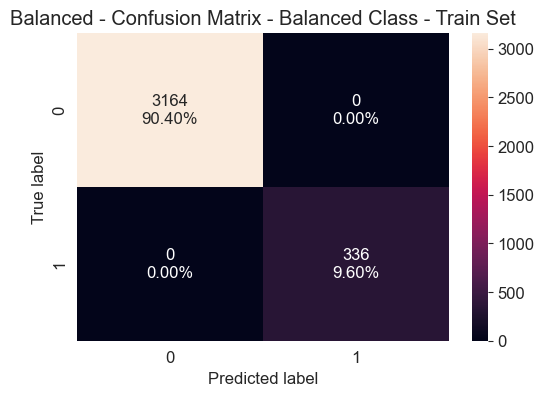

In [64]:
# Plot the confusion matrix for the train set
plot_confussion_matrix(second_tree, X_train, y_train)
plt.title("Balanced - Confusion Matrix - Balanced Class - Train Set") 
plt.show()

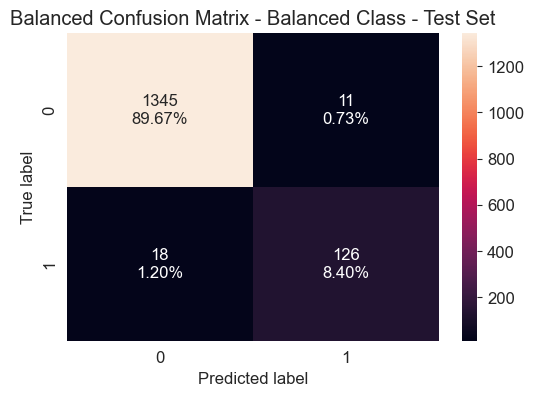

In [65]:
# Plot the confusion matrix for the testing set
plot_confussion_matrix(second_tree, X_test, y_test)
plt.title("Balanced Confusion Matrix - Balanced Class - Test Set")
plt.show()

In [66]:
# Compare the number of leaves and depth of the trees
print("-"*50)
print("Decision Tree without class weights")
print("Number of leaves: ", first_tree.get_n_leaves())
print("Depth of the tree: ", first_tree.get_depth())
print("-"*50)
print("Decision Tree with class weights")
print("Number of leaves: ", second_tree.get_n_leaves())
print("Depth of the tree: ", second_tree.get_depth())
print("-"*50)

--------------------------------------------------
Decision Tree without class weights
Number of leaves:  52
Depth of the tree:  12
--------------------------------------------------
Decision Tree with class weights
Number of leaves:  68
Depth of the tree:  11
--------------------------------------------------


#### Observation:

Both tree perform perfectly on the train data, as in both trees the evaluation metrics are equal to 1. Using the test data the Balanced Class Tree performs better and all evaluation metrics are improved. 
* F1-Score in both trees is 0.90 
* Recall in the balanced class tree is 0.875 and the original tree is 0.861
* Precision in the balanced tree is 0.92 and the original tree is 0.94
* The tree with balanced class weights has a depth of 11 and 68 leaves, while the Decision Tree without balance class weights has a depth of 12 and 52 leaves.

The Tree with balanced weight class performs sligthly better with Recall. 

Further visualization will use the first tree as there is no significant improvement. 

## Visualizing the Decision Tree

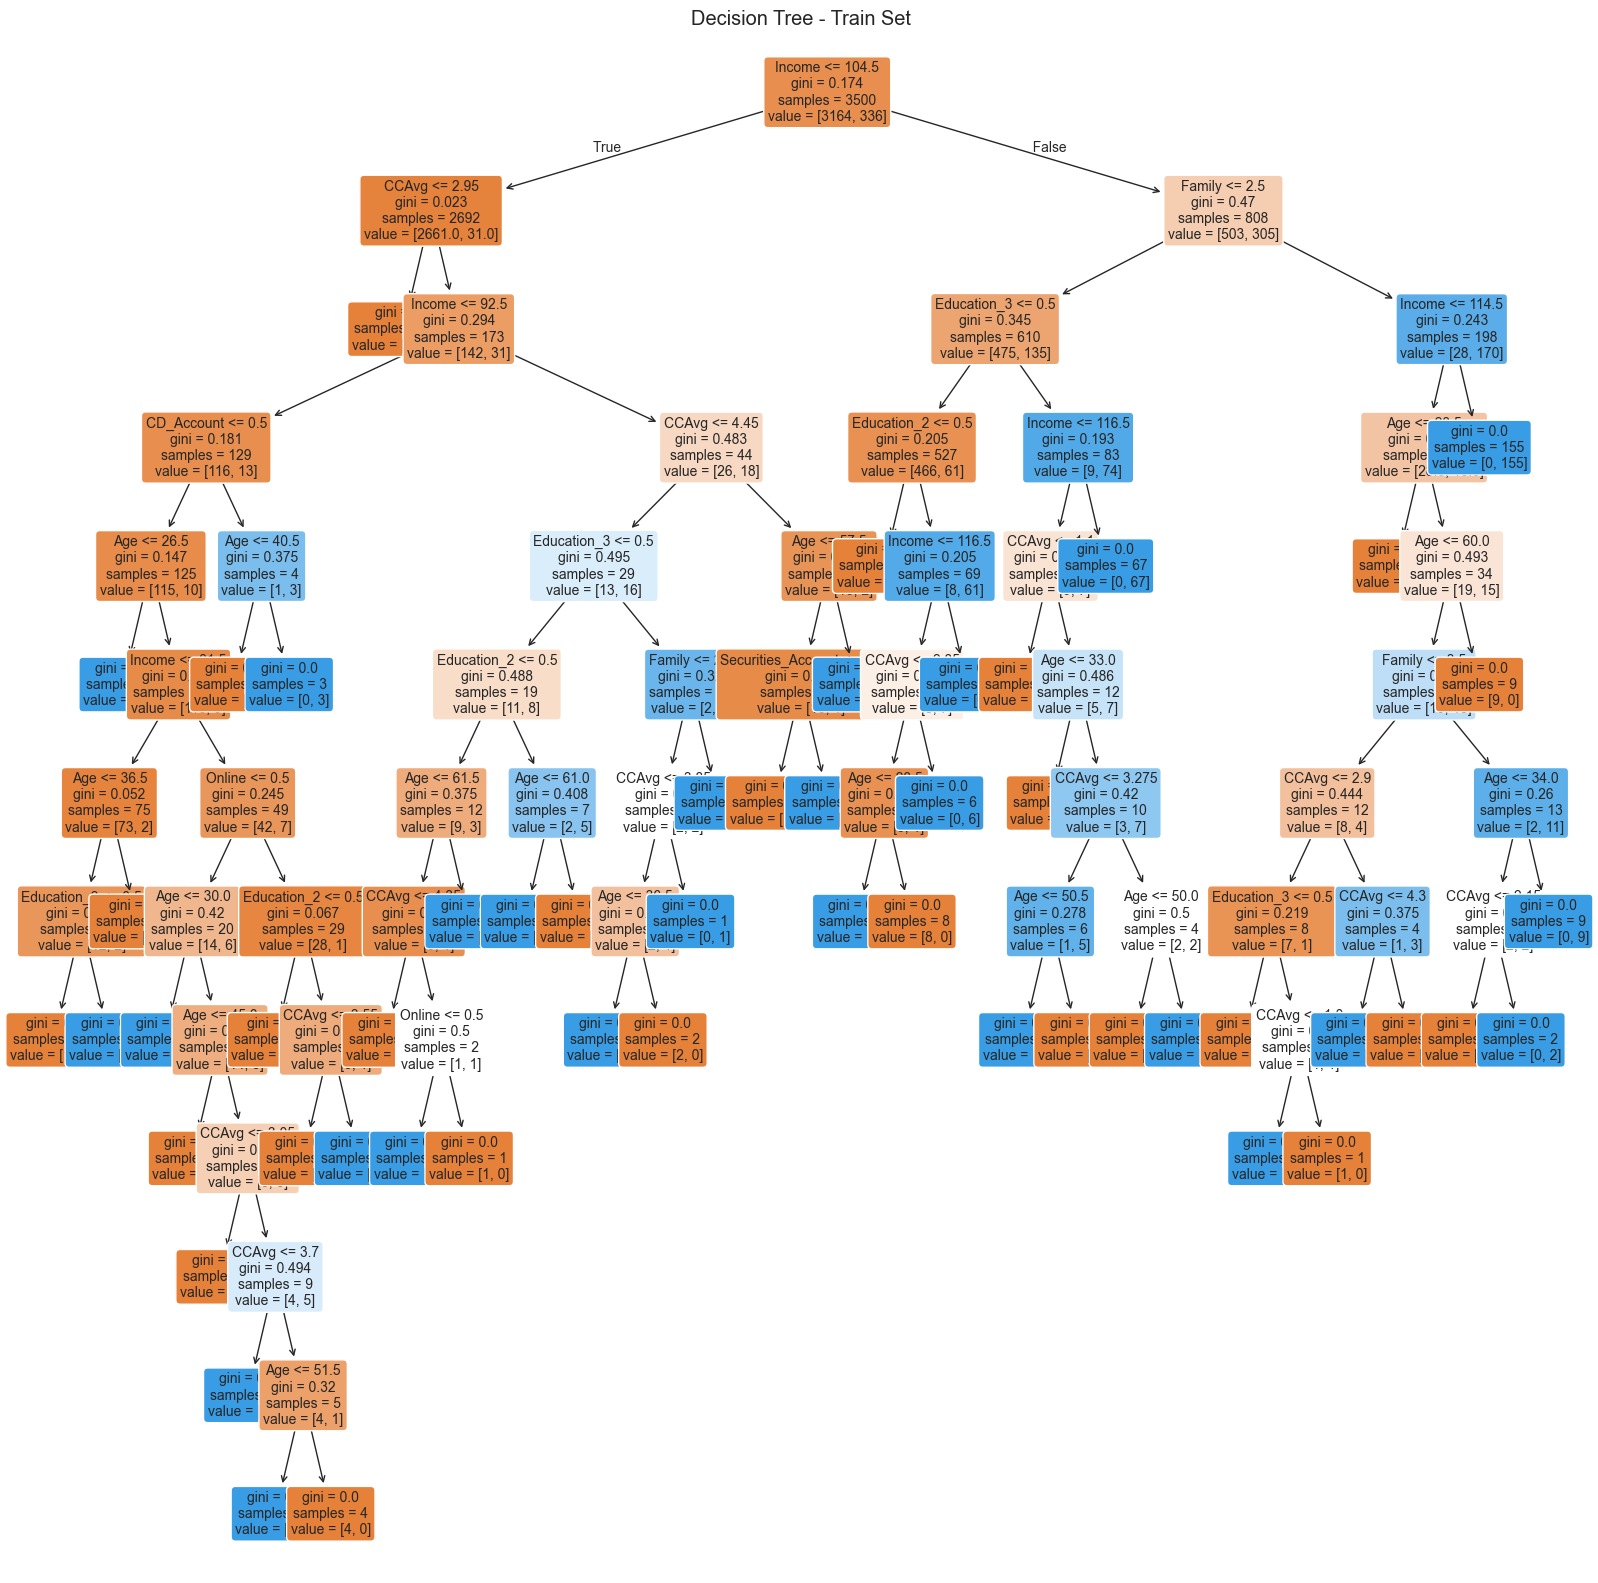

In [67]:
# Plot the decision tree
columns = X_train.columns
plt.figure(figsize=(20, 20))
first_tree_plot = tree.plot_tree(first_tree, feature_names=columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree - Train Set")
plt.show()

In [68]:
# printing the text report of the decision tree
print(tree.export_text(first_tree, feature_names=columns, show_weights=True))

|--- Income <= 104.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2519.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |   |--- weights: [61.00, 0.00] class: 0
|   |   |   |   |   |--- Income >  81.50
|   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |--- Age <= 30.00
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |--- Age >  30.00
|   |   |   |   | 

#### Observation:
* The tree is very complex and the hyperparametrs have to be optimized in order to have a less complex tree. 
---
**Decision Tree without class weights**
* Number of leaves:  52
* Depth of the tree:  12

## Feature Importance

In [69]:
# Obtain the feature importances from the first tree
feature_importance = pd.DataFrame(first_tree.feature_importances_, index=columns, columns=["Importance"]).sort_values("Importance", ascending=False)
feature_importance["Importance %"] = (feature_importance["Importance"] * 100).round(2)
feature_importance

Importance  Importance %
Income                0.357039         35.70
Family                0.207239         20.72
Education_2           0.163788         16.38
Education_3           0.146424         14.64
CCAvg                 0.059631          5.96
Age                   0.052700          5.27
CD_Account            0.005728          0.57
Online                0.004393          0.44
Securities_Account    0.003057          0.31
CreditCard            0.000000          0.00
Mortgage              0.000000          0.00
ZIPCode_91            0.000000          0.00
ZIPCode_92            0.000000          0.00
ZIPCode_94            0.000000          0.00
ZIPCode_93            0.000000          0.00
ZIPCode_96            0.000000          0.00
ZIPCode_95            0.000000          0.00

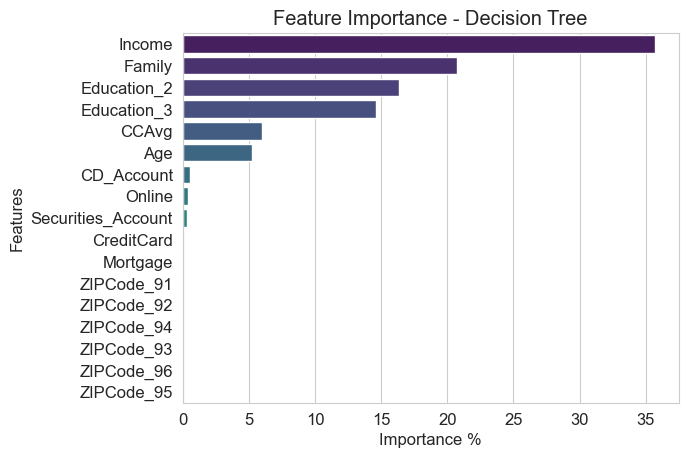

In [70]:
# Plot the feature importances
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance %")
plt.ylabel("Features")
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.barplot(x=feature_importance["Importance %"], y=feature_importance.index, palette="viridis")
    plt.show()

Observations:
* Income, is the most influential feature with 35.70% importance.
* Family, is the second most influential feature with 20.72% importnace.
* Graduates (Education 2) and Advance Professionals (Education 3) have a combined 31.02% importance. (16.38% and 14.64%) 
* Credit Card spending and Age are moderately influential features with 5.96% and 5.27% respectively. 
* CD Account, Onlinemand Securities account have a low influence.

# 7 - Model Performance Improvement

## Pre-Prunning - Recall Score

In [71]:
# Initialize a Decision Tree Classifier
estimator = DecisionTreeClassifier(random_state=RS)

# Define the parameter grid for GridSearchCV
parameters = {
    "class_weight": ["balanced", None],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],    
} 

# Define the scoring metric 
scorer = make_scorer(recall_score)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

estimator = grid_search.best_estimator_
print("Best parameters from GridSearchCV:")
print(grid_search.best_params_)
print("Best Recall from GridSearchCV:")
print(grid_search.best_score_)
# Fit the model with the best parameters
estimator.fit(X_train, y_train)

Best parameters from GridSearchCV:
{'class_weight': 'balanced', 'max_depth': np.int64(2), 'max_leaf_nodes': 50, 'min_samples_split': 10}
Best Recall from GridSearchCV:
0.9970149253731343


DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

#### Observation:
* It is better to use balanced class weights. 
* Max Depth of 2.
* Max leaf nodes of 50.
* Both returned min samples plit of 10.

The Pre-prunned tree is less complex than the Balanced and Unbalance Models. Also has a much better Recall Score with 0.98, compared to 0.86 and 0.87 of the Balanced and Unbalance Models.

A depth of 2 might cause underfitting. Evaluating the model will be important to notice how this model perfoms with test data. 

### Pre-Prunning - Best Estimators - Model Evaluation

In [72]:
# fit the model with the best parameters
pre_tree = estimator
pre_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

In [73]:
pre_tree_train_performance = model_performance_classification(pre_tree, X_train, y_train)
print("Train Performance")
print(pre_tree_train_performance)
pre_tree_test_performance = model_performance_classification(pre_tree, X_test, y_test)
print("Test Performance")
print(pre_tree_test_performance)

Train Performance
   Accuracy  Recall  Precision        F1
0       0.8     1.0   0.324324  0.489796
Test Performance
   Accuracy  Recall  Precision        F1
0     0.816     1.0   0.342857  0.510638


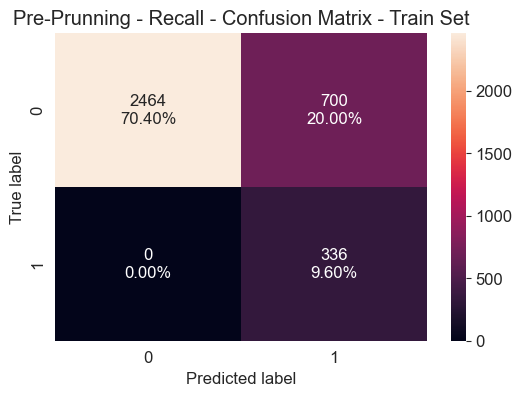

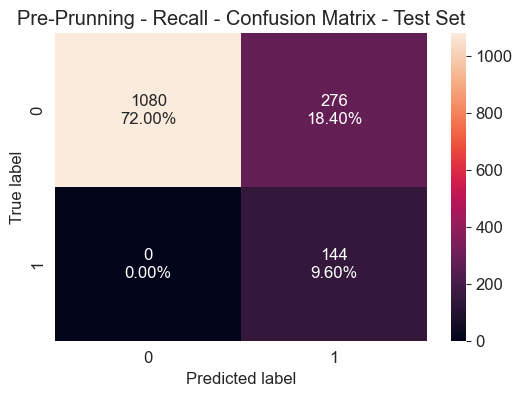

In [74]:
# Plot the Pre-Prunning confusion matrix for the training set
plot_confussion_matrix(pre_tree, X_train, y_train)
plt.title("Pre-Prunning - Recall - Confusion Matrix - Train Set")
plt.show()

# Plot the Pre-Prunning confusion matrix for the testing set
plot_confussion_matrix(pre_tree, X_test, y_test)
plt.title("Pre-Prunning - Recall - Confusion Matrix - Test Set")
plt.show()

#### Observations:

**Pre-Pruned Decision Tree Confusion Matrix - Test Set**

* True Negatives (TN): 1080 (72.00%)
* False Positives (FP): 276 (18.40%)
* False Negatives (FN): 0 (0.00%)
* True Positives (TP): 144 (9.60%)

* Perfect Recall: With no false negatives, the pre-pruned model captures all actual positive cases, achieving a recall of 100%. This means the model is very aggressive in flagging potential positives.
* High False Positive Rate: The large number of false positives (276) indicates that many negatives are wrongly classified as positives. This significantly hurts the precision and overall reliability of the model.

In [75]:
# Compare the performance of the first, second and pre-prunned trees
print("First Decision Tree Performance - Train Performance")
print(first_tree_train_performance)
print("-"*50)
print("First Decision Tree Performance - Test Performance")
print(first_tree_test_performance)
print("-"*50)
second_tree_train_performance = model_performance_classification(second_tree, X_train, y_train)
print("Balanced Class Decision Tree - Train Performance")
print(second_tree_train_performance)
print("-"*50)
second_tree_test_performance = model_performance_classification(second_tree, X_test, y_test)
print("Balanced Class Decision Tree - Test Performance")
print(second_tree_test_performance) 
print("-"*50)
print("Pre-Prunning Decision Tree - Train Performance")
print(pre_tree_train_performance)
print("-"*50)
print("Pre-Prunning Decision Tree - Test Performance")
print(pre_tree_test_performance)
print("-"*50)

First Decision Tree Performance - Train Performance
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
--------------------------------------------------
First Decision Tree Performance - Test Performance
   Accuracy    Recall  Precision        F1
0  0.981333  0.861111   0.939394  0.898551
--------------------------------------------------
Balanced Class Decision Tree - Train Performance
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
--------------------------------------------------
Balanced Class Decision Tree - Test Performance
   Accuracy  Recall  Precision        F1
0  0.980667   0.875   0.919708  0.896797
--------------------------------------------------
Pre-Prunning Decision Tree - Train Performance
   Accuracy  Recall  Precision        F1
0       0.8     1.0   0.324324  0.489796
--------------------------------------------------
Pre-Prunning Decision Tree - Test Performance
   Accuracy  Recall  Precision        F1
0     0.816     1


#### Observations:
* The **Pre-Pruning Decision Tree** introduces significant complexity reduction but lowers precision, impacting predictive effectiveness. 
* Comparing against the Balanced Class Tree, the Pre-prunning Desicion Tree has a better Recall.
* The Pre-Prunned tree - Accuracy, Precision and F1 Score are performing much worst in training and in testing sets. 
* In the testing set, there is an 18% increment in False Positives. 
* The Pre-prunning Tree is less complex, as it has smaller depth and leave nodes. 


| Model Type                     | Dataset | Accuracy  | Recall   | Precision | F1       |
|--------------------------------|---------|-----------|----------|-----------|----------|
| **First Decision Tree**         | Train   | 1.0       | 1.0      | 1.0       | 1.0      |
|                                | Test    | 0.981333  | 0.861111 | 0.939394  | 0.898551 |
| **Balanced Class Decision Tree** | Train   | 1.0       | 1.0      | 1.0       | 1.0      |
|                                | Test    | 0.980667  | 0.875    | 0.919708  | 0.896797 |
| **Pre-Pruning Decision Tree**    | Train   | 0.8       | 1.0      | 0.324324  | 0.489796 |
|                                | Test    | 0.816     | 1.0      | 0.342857  | 0.510638 |



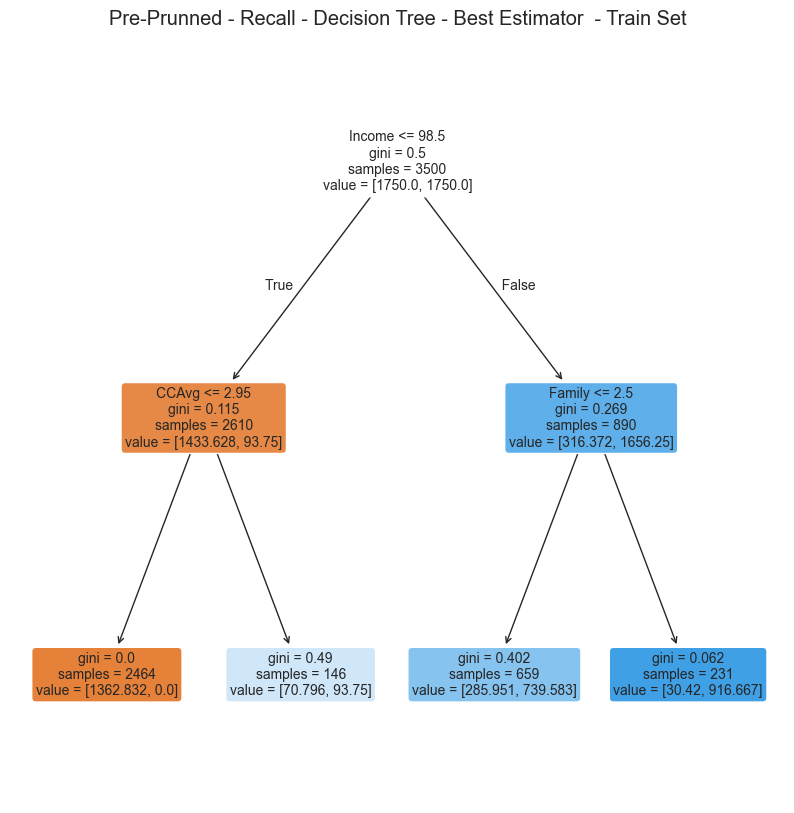

In [76]:
# Plot the Pre-prunned Decision Tree
plt.figure(figsize=(10, 10))
pre_tree_plot = tree.plot_tree(pre_tree, feature_names=columns, filled=True, rounded=True, fontsize=10)
plt.title("Pre-Prunned - Recall - Decision Tree - Best Estimator  - Train Set")
plt.show()

In [77]:
# The text report of the decision tree
print(tree.export_text(pre_tree, feature_names=columns, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1362.83, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [70.80, 93.75] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- weights: [285.95, 739.58] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [30.42, 916.67] class: 1



In [78]:
# Obtain the feature importances from the Pre-prunned tree
feature_importance = pd.DataFrame(pre_tree.feature_importances_, index=columns, columns=["Importance"]).sort_values("Importance", ascending=False)
feature_importance["Importance %"] = (feature_importance["Importance"] * 100).round(2)
feature_importance

Importance  Importance %
Income                0.870403         87.04
CCAvg                 0.079565          7.96
Family                0.050032          5.00
Age                   0.000000          0.00
Mortgage              0.000000          0.00
Securities_Account    0.000000          0.00
CD_Account            0.000000          0.00
Online                0.000000          0.00
CreditCard            0.000000          0.00
ZIPCode_91            0.000000          0.00
ZIPCode_92            0.000000          0.00
ZIPCode_93            0.000000          0.00
ZIPCode_94            0.000000          0.00
ZIPCode_95            0.000000          0.00
ZIPCode_96            0.000000          0.00
Education_2           0.000000          0.00
Education_3           0.000000          0.00

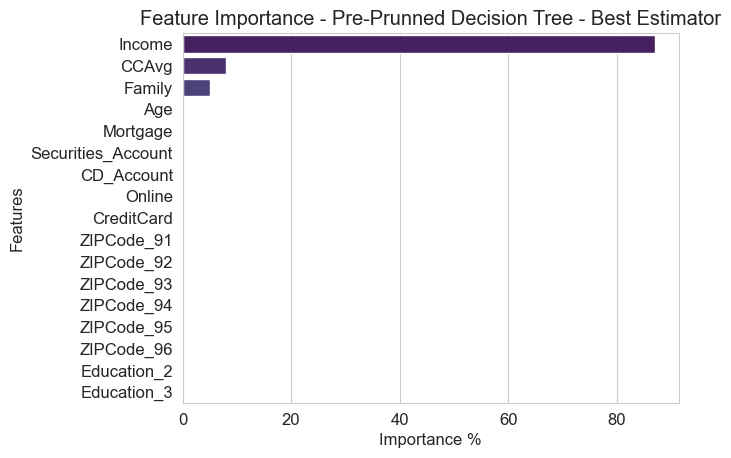

In [79]:
# Plot the feature importances
plt.title("Feature Importance - Pre-Prunned Decision Tree - Best Estimator")
plt.xlabel("Importance %")
plt.ylabel("Features")
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.barplot(x=feature_importance["Importance %"], y=feature_importance.index, palette="viridis")
    plt.show()

#### Observations
* The Pre-prunned tree, reduces the number of influential features. 
* Income has a 87% importance. Is the most influential feature.
* Credit Card Spending is the second most influential feature with 7.96%
* Family is now the third most influential feature with 5% importance. 
* The rest of the features have no influence. 

## Post-Prunning - Recall Score

In [80]:
# Initiate a post-prunning Decision Tree Classifier
post_tree = DecisionTreeClassifier(random_state=RS)
path = post_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [81]:
# Observe alphas and impurities
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000250    0.000500
2     0.000257    0.001014
3     0.000276    0.001566
4     0.000286    0.002137
5     0.000343    0.002480
6     0.000400    0.003680
7     0.000429    0.004109
8     0.000429    0.004537
9     0.000457    0.004995
10    0.000467    0.005461
11    0.000470    0.009222
12    0.000484    0.010189
13    0.000488    0.010677
14    0.000495    0.011667
15    0.000508    0.012175
16    0.000583    0.012758
17    0.000595    0.013354
18    0.000667    0.016023
19    0.000938    0.016961
20    0.000989    0.017950
21    0.000994    0.018944
22    0.001076    0.021097
23    0.001625    0.022723
24    0.001782    0.024505
25    0.001908    0.026413
26    0.002335    0.028748
27    0.002970    0.031718
28    0.008156    0.039874
29    0.025722    0.091318
30    0.034690    0.126007
31    0.047561    0.173568

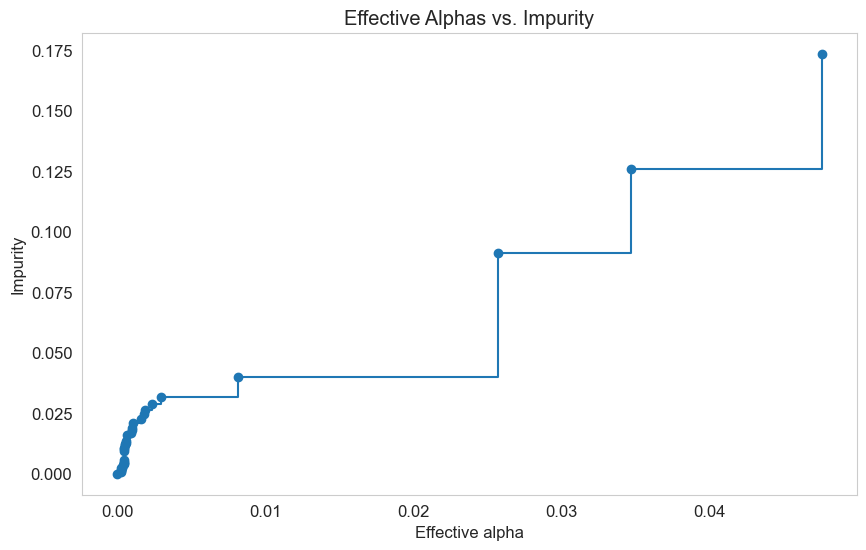

In [82]:
# Plot the effective alphas
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker="o", drawstyle="steps-post")
plt.title("Effective Alphas vs. Impurity")
plt.xlabel("Effective alpha")
plt.ylabel("Impurity")
plt.grid()
plt.show()

#### Observation:
* After alpha value of 0.02, impurity rises and the model lost detail. 
After alpha value of 0.04 the model has been prunned excessively. 
* The value for alpha is likely to be between 0.005 and 0.02, where impurity is still acceptable and a reducction in overfitting is possible. 

In [83]:
clfs = []
for ccp_alpha in ccp_alphas:
    # Create a new Decision Tree Classifier with the current alpha
    clf = DecisionTreeClassifier(random_state=RS, ccp_alpha=ccp_alpha, class_weight="balanced")
    
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    
    # Append the classifier to the list
    clfs.append(clf)

# Print the number of nodes in each tree
for i, clf in enumerate(clfs):
    print(f"CCP Alpha: {ccp_alphas[i]:.4f}, Number of nodes: {clf.tree_.node_count}")

print("-"*50)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

CCP Alpha: 0.0000, Number of nodes: 135
CCP Alpha: 0.0003, Number of nodes: 99
CCP Alpha: 0.0003, Number of nodes: 99
CCP Alpha: 0.0003, Number of nodes: 99
CCP Alpha: 0.0003, Number of nodes: 95
CCP Alpha: 0.0003, Number of nodes: 77
CCP Alpha: 0.0004, Number of nodes: 77
CCP Alpha: 0.0004, Number of nodes: 77
CCP Alpha: 0.0004, Number of nodes: 77
CCP Alpha: 0.0005, Number of nodes: 77
CCP Alpha: 0.0005, Number of nodes: 77
CCP Alpha: 0.0005, Number of nodes: 77
CCP Alpha: 0.0005, Number of nodes: 75
CCP Alpha: 0.0005, Number of nodes: 75
CCP Alpha: 0.0005, Number of nodes: 75
CCP Alpha: 0.0005, Number of nodes: 75
CCP Alpha: 0.0006, Number of nodes: 71
CCP Alpha: 0.0006, Number of nodes: 65
CCP Alpha: 0.0007, Number of nodes: 65
CCP Alpha: 0.0009, Number of nodes: 43
CCP Alpha: 0.0010, Number of nodes: 43
CCP Alpha: 0.0010, Number of nodes: 43
CCP Alpha: 0.0011, Number of nodes: 43
CCP Alpha: 0.0016, Number of nodes: 29
CCP Alpha: 0.0018, Number of nodes: 29
CCP Alpha: 0.0019, Numbe

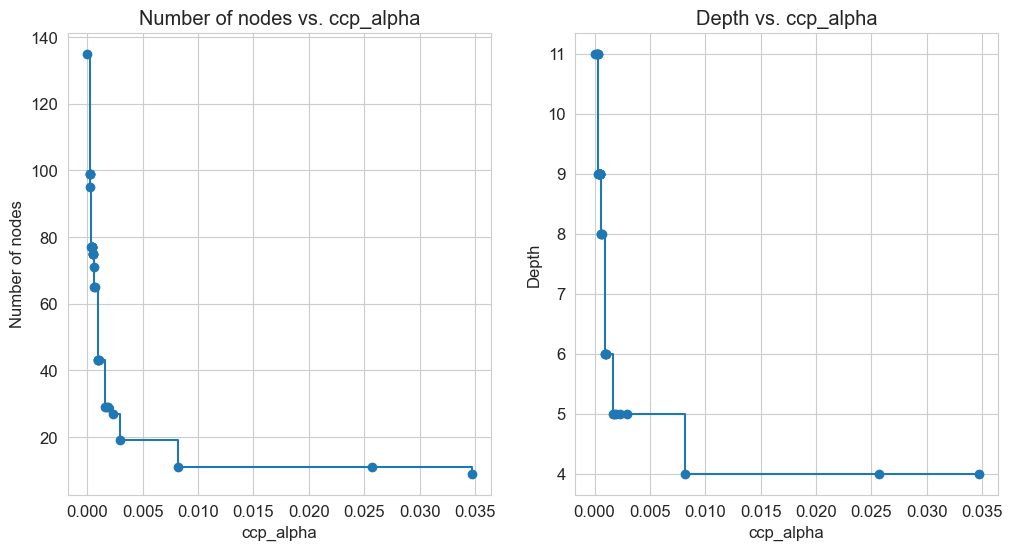

In [84]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depths = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_title("Number of nodes vs. ccp_alpha")
ax[0].set_xlabel("ccp_alpha")
ax[0].set_ylabel("Number of nodes")
ax[1].plot(ccp_alphas, depths, marker="o", drawstyle="steps-post")
ax[1].set_title("Depth vs. ccp_alpha")
ax[1].set_xlabel("ccp_alpha")
ax[1].set_ylabel("Depth")
plt.show()

#### Observations:
* The tree starts with over 138 nodes, being a very complex tree. 
* As alpha increases there is a sharp reduction in the number of nodes.
* By alpha having a value of 0.03, there are very few nodes.  
* The tree starts with a depth of 11, as alpha increases the depth is reduced.
* After an alpha of 0.03 the tree has depth of 2.
* Alpha likely falls between 0.005 and 0.02

In [85]:
# Obtain the recall scores for each tree with train data
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)
    
# Obtain the recall scores for each tree with test data
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

train_recall_scores = [clf.score(X_train, y_train) for clf in clfs]
test_recall_scores = [clf.score(X_test, y_test) for clf in clfs]

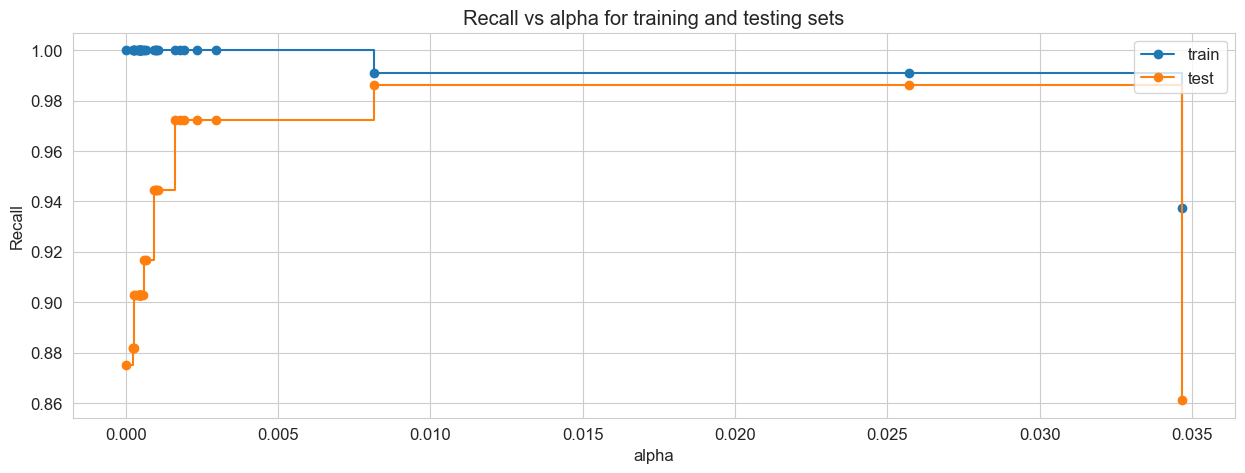

In [86]:
# Plot alpha vs recall
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#### Observations:
* On training, high Recall of 1 happens when alpha ranges between 0.00 and 0.07.
* Alphas between 0.07 and 0.034 gives a Recall of 99%. 
* Recall falls to 0.88 with alphas near to 0.035
* On training, Recall reaches 0.99 when alpha reaches a value of 0.008.
* Recall falls to 0.86 arround alpha 0.035

In [87]:
# define parameters for GridSearchCV
params = {
    "ccp_alpha": ccp_alphas,
    "class_weight": ["balanced", None],
    }
grid = GridSearchCV(DecisionTreeClassifier(random_state=RS), params, scoring="recall", cv=5)
grid.fit(X_train, y_train)
best_clf = grid.best_estimator_
print("Best parameters from GridSearchCV:")
print(grid.best_params_)
print("Best Recall from GridSearchCV:")
print(grid.best_score_)
print(f"Max depth: {best_clf.get_depth()}")
print(f"Number of Leaves: {best_clf.get_n_leaves()}")


Best parameters from GridSearchCV:
{'ccp_alpha': np.float64(0.008155978388536527), 'class_weight': 'balanced'}
Best Recall from GridSearchCV:
0.9881474978050921
Max depth: 4
Number of Leaves: 6


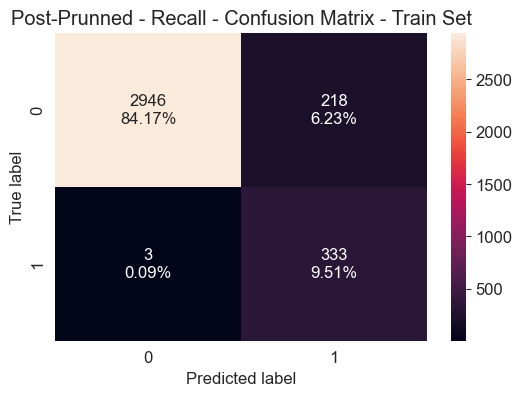

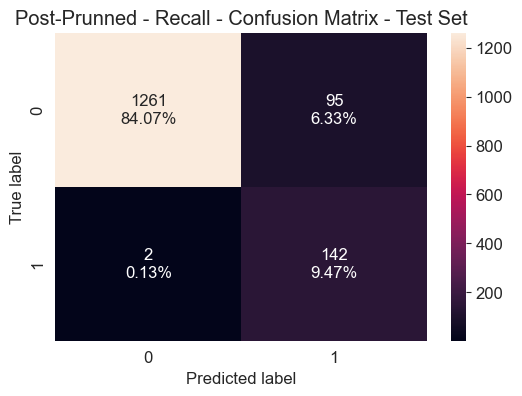

In [88]:
# Plot the confusion matrix for the training set
plot_confussion_matrix(best_clf, X_train, y_train)
plt.title("Post-Prunned - Recall - Confusion Matrix - Train Set")
plt.show()
# Plot the confusion matrix for the testing set
plot_confussion_matrix(best_clf, X_test, y_test)
plt.title("Post-Prunned - Recall - Confusion Matrix - Test Set")
plt.show()


#### Observations:

**Post-Pruned Decision Tree Confusion Matrix - Test Set**

* True Negatives (TN): 1261 (84.07%)
* False Positives (FP): 95 (6.33%)
* False Negatives (FN): 2 (0.13%)
* True Positives (TP):** 142 (9.47%)

* After pruning, the model significantly reduces misclassifications. The number of false positives drops sharply from 276 in the Pre-Prunned model to 95. Although there are a couple of false negatives (FN = 2), the overall precision improves.
* With 1261 true negatives (84.07%), the post-pruned model correctly identifies more non-loan cases, which is critical for reducing unnecessary follow-up actions.
* The slight decrease in recall from 1 in the Pre-prunned model to 0.98 is acceptable given the substantial improvement in precision and overall accuracy.

In [89]:
# Get the performance of the best classifier on the training set
post_tree_train_performance = model_performance_classification(best_clf, X_train, y_train)
# Get the performance of the best classifier on the testing set
post_tree_test_performance = model_performance_classification(best_clf, X_test, y_test)

In [90]:
# Compare the performance of the first, second and pre-prunned trees
print("First Decision Tree Performance - Train Performance")
print(first_tree_train_performance)
print("-"*50)
print("First Decision Tree Performance - Test Performance")
print(first_tree_test_performance)
print("-"*50)
second_tree_train_performance = model_performance_classification(second_tree, X_train, y_train)
print("-"*50)
print("Pre-Prunning Decision Tree - Train Performance")
print(pre_tree_train_performance)
print("-"*50)
print("Pre-Prunning Decision Tree - Test Performance")
print(pre_tree_test_performance)
print("-"*50)
print("Post-Prunning Decision Tree - Train Performance")
print(post_tree_train_performance)
print("-"*50)
print("Post-Prunning Decision Tree - Test Performance")
print(post_tree_test_performance)
print("-"*50)

First Decision Tree Performance - Train Performance
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
--------------------------------------------------
First Decision Tree Performance - Test Performance
   Accuracy    Recall  Precision        F1
0  0.981333  0.861111   0.939394  0.898551
--------------------------------------------------
--------------------------------------------------
Pre-Prunning Decision Tree - Train Performance
   Accuracy  Recall  Precision        F1
0       0.8     1.0   0.324324  0.489796
--------------------------------------------------
Pre-Prunning Decision Tree - Test Performance
   Accuracy  Recall  Precision        F1
0     0.816     1.0   0.342857  0.510638
--------------------------------------------------
Post-Prunning Decision Tree - Train Performance
   Accuracy    Recall  Precision        F1
0  0.936857  0.991071   0.604356  0.750846
--------------------------------------------------
Post-Prunning Decision Tree - Test Perform

#### Observations:
* The post prune tree has a very high recall in training and testing data sets (0.98 and 0.99).
* Accuracy has a value of 0.93 in both sets. 
* Precision is 0.59 in testing set, and is better than the pre prunned tree 0.34. 
* F1 Score is 0.74, and is also better than pre prunned tree 0.51. 
* The post prunne tree has a depth of 4 and max leaves of 6. 
* On testing the model still predicts false positives 6.33% and is much better than the Pre-Prunned tree 18.40%. 

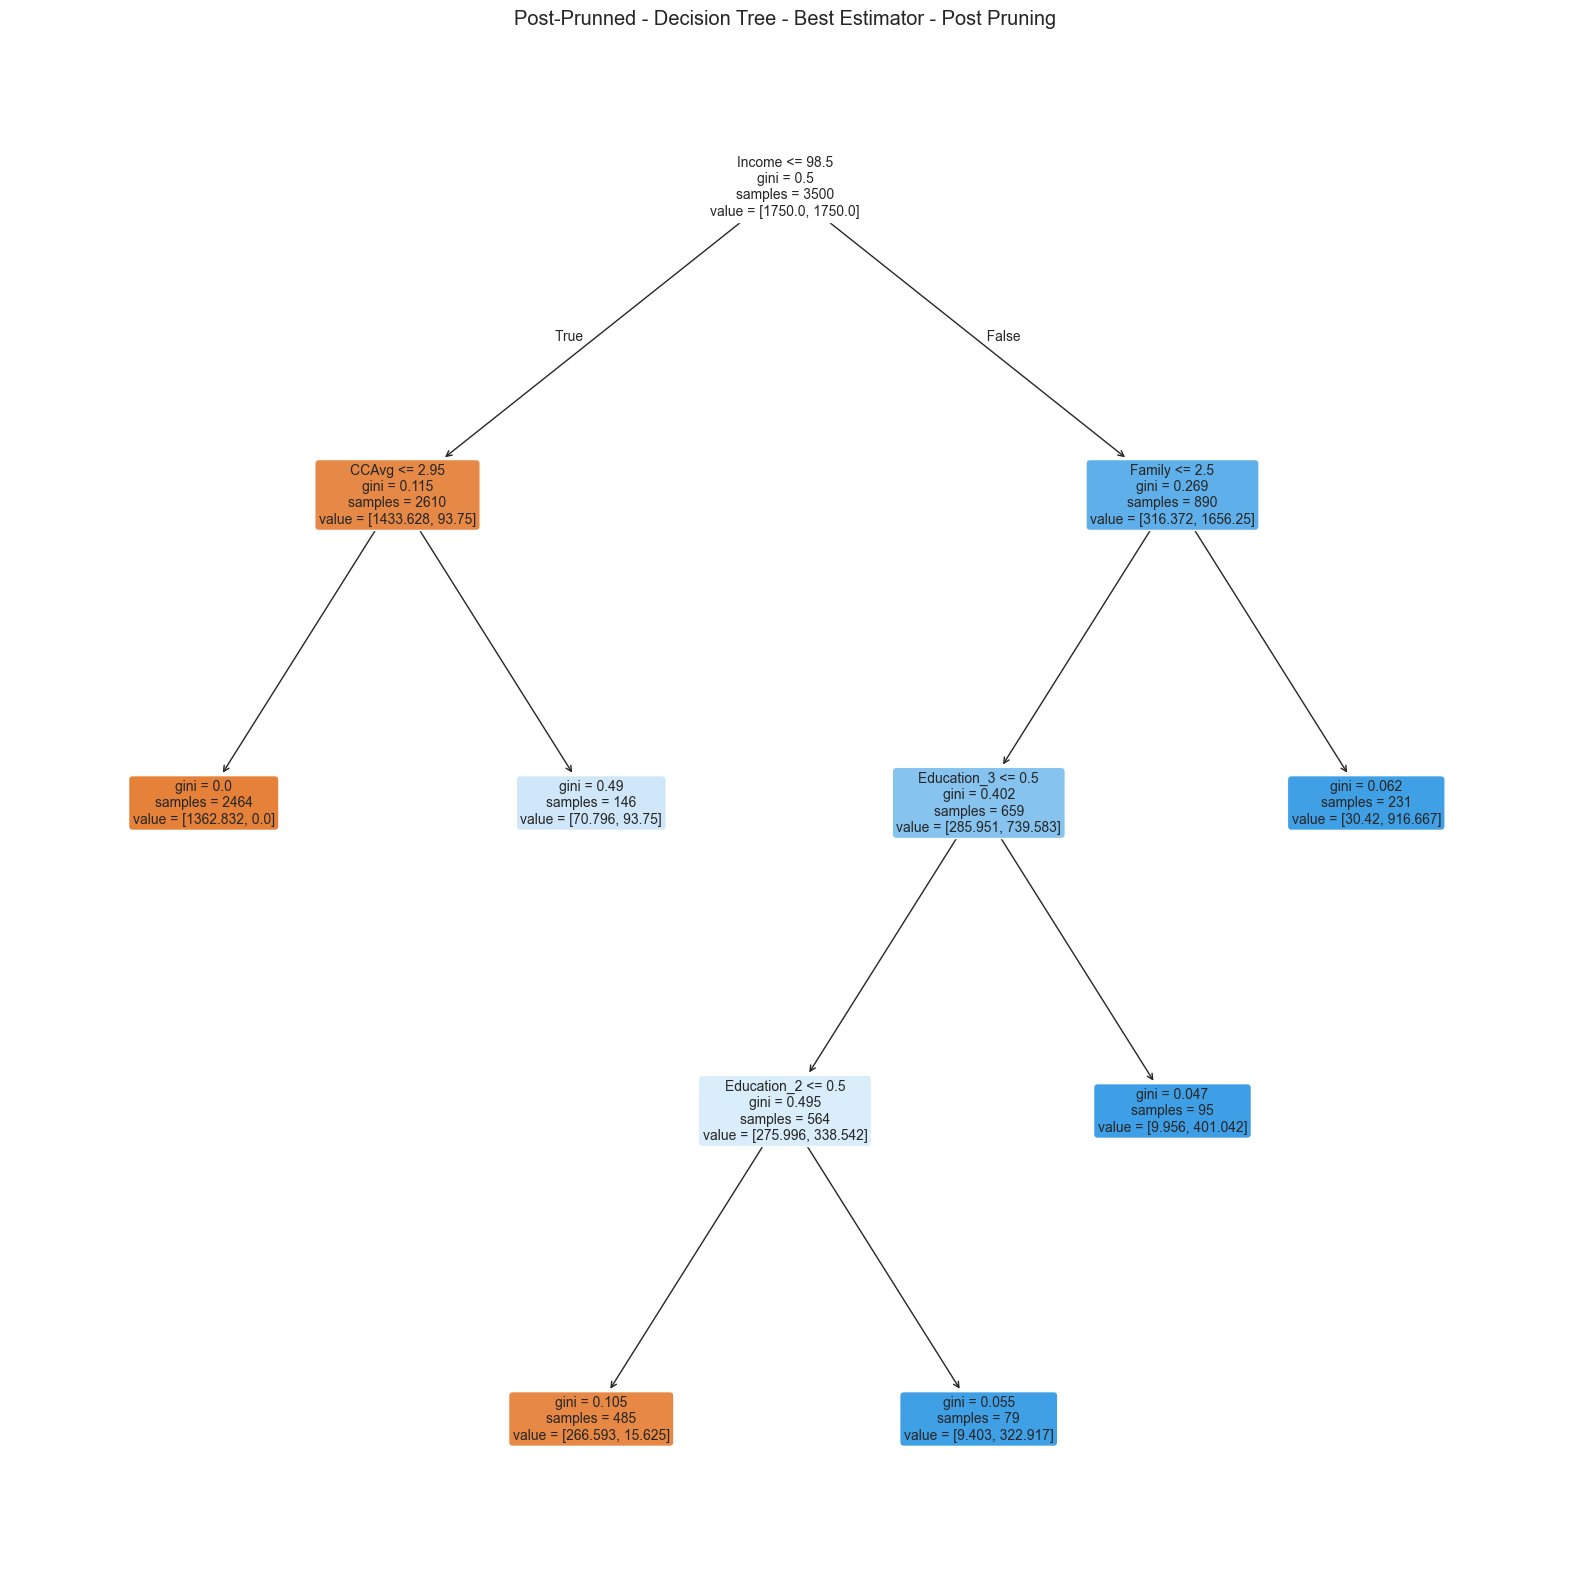

In [91]:
# plot the Post-Prunned Decision Tree
plt.figure(figsize=(20, 20))
post_tree_plot = tree.plot_tree(best_clf, feature_names=columns, filled=True, rounded=True, fontsize=10)
plt.title("Post-Prunned - Decision Tree - Best Estimator - Post Pruning")
plt.show()

In [92]:
# printing the text report of the decision tree
print(tree.export_text(best_clf, feature_names=columns, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1362.83, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [70.80, 93.75] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [266.59, 15.62] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [9.40, 322.92] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [9.96, 401.04] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [30.42, 916.67] class: 1



In [93]:
# Obtain the feature importances from the Post-prunned tree
feature_importance = pd.DataFrame(best_clf.feature_importances_, index=columns, columns=["Importance"]).sort_values("Importance", ascending=False)
feature_importance["Importance %"] = (feature_importance["Importance"] * 100).round(2)
feature_importance

Importance  Importance %
Income                0.675695         67.57
Education_2           0.166077         16.61
CCAvg                 0.061766          6.18
Education_3           0.057622          5.76
Family                0.038840          3.88
Age                   0.000000          0.00
CD_Account            0.000000          0.00
Securities_Account    0.000000          0.00
Mortgage              0.000000          0.00
CreditCard            0.000000          0.00
Online                0.000000          0.00
ZIPCode_91            0.000000          0.00
ZIPCode_92            0.000000          0.00
ZIPCode_94            0.000000          0.00
ZIPCode_93            0.000000          0.00
ZIPCode_96            0.000000          0.00
ZIPCode_95            0.000000          0.00

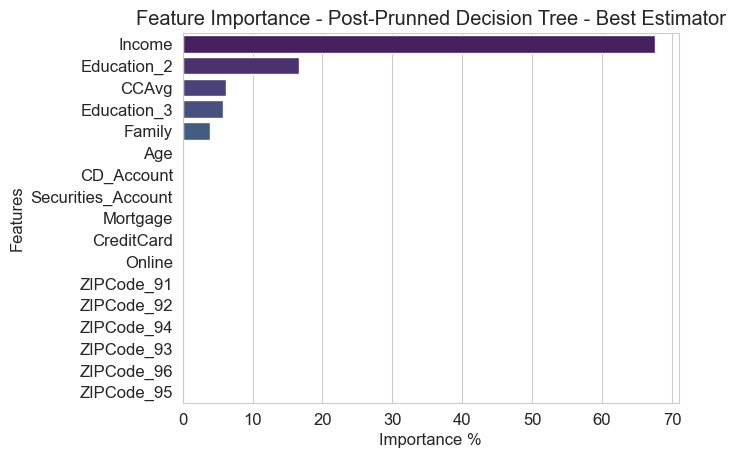

In [94]:
# Plot the feature importances
plt.title("Feature Importance - Post-Prunned Decision Tree - Best Estimator")
plt.xlabel("Importance %")
plt.ylabel("Features")
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.barplot(x=feature_importance["Importance %"], y=feature_importance.index, palette="viridis")
    plt.show()

#### Observations:
* Income remains the most significant feature with 67.57%
* Graduate customers are the second most significant feature with 16.61%
* CCAvg is now the third most important feature with 6.18%
* Advance professionals with 5.76 feauture importance.
* Family size with 3.88% feauture importance.
* The rest of the feautures don't have significance. 

# 8 - Model Performance Comparison and Final Model Selection

In [95]:
# Comparing models performance with Recall as evaluation metric
models_train_comparison_recall = pd.concat(
    [
        first_tree_train_performance.T,
        second_tree_train_performance.T,
        pre_tree_train_performance.T,
        post_tree_train_performance.T,
    ],
    axis=1,
)
models_train_comparison_recall.columns = [
    "First Tree without class weight",
    "Second Tree with class weight",
    "Pre Pruning",
    "Post Pruning",
]
print("Train Performance Comparison")
models_train_comparison_recall

Train Performance Comparison


First Tree without class weight  Second Tree with class weight  \
Accuracy                               1.0                            1.0   
Recall                                 1.0                            1.0   
Precision                              1.0                            1.0   
F1                                     1.0                            1.0   

           Pre Pruning  Post Pruning  
Accuracy      0.800000      0.936857  
Recall        1.000000      0.991071  
Precision     0.324324      0.604356  
F1            0.489796      0.750846

In [96]:
# Comparing models performance with Recall as evaluation metric
models_test_comparison_recall = pd.concat(
    [
        first_tree_test_performance.T,
        second_tree_test_performance.T,
        pre_tree_test_performance.T,
        post_tree_test_performance.T,
    ],
    axis=1,
)
models_test_comparison_recall.columns = [
    "First Tree without class weight",
    "Second Tree with class weight",
    "Pre Pruning",
    "Post Pruning",
]
print("Test Performance Comparison")
models_test_comparison_recall

Test Performance Comparison


First Tree without class weight  Second Tree with class weight  \
Accuracy                          0.981333                       0.980667   
Recall                            0.861111                       0.875000   
Precision                         0.939394                       0.919708   
F1                                0.898551                       0.896797   

           Pre Pruning  Post Pruning  
Accuracy      0.816000      0.935333  
Recall        1.000000      0.986111  
Precision     0.342857      0.599156  
F1            0.510638      0.745407

In [97]:
# Compare the complexity of the models with Recall as evaluation metric
print("-"*50)
print("Model Complexity Comparison")
print("Decision Tree without class weights")
print("Number of leaves: ", first_tree.get_n_leaves())
print("Depth of the tree: ", first_tree.get_depth())
print("-"*50)
print("Decision Tree with class weights")
print("Number of leaves: ", second_tree.get_n_leaves())
print("Depth of the tree: ", second_tree.get_depth())
print("-"*50)
print("Pre Prunning Decision Tree - Recall")
print("Number of leaves: ", pre_tree.get_n_leaves())
print("Depth of the tree: ", pre_tree.get_depth())
print("-"*50)
print("Post Prunning Decision Tree - Recall")
print("Number of leaves: ", best_clf.get_n_leaves())
print("Depth of the tree: ", best_clf.get_depth())
print("-"*50)

--------------------------------------------------
Model Complexity Comparison
Decision Tree without class weights
Number of leaves:  52
Depth of the tree:  12
--------------------------------------------------
Decision Tree with class weights
Number of leaves:  68
Depth of the tree:  11
--------------------------------------------------
Pre Prunning Decision Tree - Recall
Number of leaves:  4
Depth of the tree:  2
--------------------------------------------------
Post Prunning Decision Tree - Recall
Number of leaves:  6
Depth of the tree:  4
--------------------------------------------------


#### Observations:
* The Pre-Prunning and Post-Prunning trees have significantly reduced complexity. 
* The Pre-Prunned tree is the less complex tree, with a depth of 2 and 4 leaves. Nevertheless it's the one with worst performance and the one that generated more False Positives (18% of Test Set). 
* The Post-Prunning tree is the second less complex tree with a depth of 4 and 6 leaves. It performs much better than the Pre-Prunning tree as it only produced 6.33% of False Positives with the testing set. 
* Both Prunned trees performed extremley well with False Negatives. The Pre-Prunned Tree has a recall of 1, and produced 0 False Negatives. While the Post Prunned has a Recall of .98 and produced 2 False Negatives. 

## 9 - Actionable Insights and Business Recommendations



---
**Insights and Recommendations for the Post-Pruned Decision Tree**
* The root node splits on an income threshold ≤ 98.5, showing that income is the most influential feature in determining loan adoption.
* For individuals with lower income, the subsequent split on CCAvg ≤ 2.95 indicates that credit card spending is crucial for segmentation.
* Further splits based on family size and education underline their supporting roles in refining the decision outcome.
* Post-pruning has eliminated redundant nodes, resulting in a simpler tree that still captures the essential patterns. This prevents overfitting and promotes better generalization to unseen data.
* The tree has a depth of 4 and contains 6 leaves.
* False Negatives: On the testing set, the model produced 2 (0.13%) false negatives.
* False Positives: On the testing set, the model produced 95 (6.33%) false positives.
* The lower number of false positives, compared to the pre-pruned tree, minimizes the risk of misclassifying non-loan customers as potential loan adopters.
* The model’s strong performance on the test set indicates that post-pruning has helped maintain a balance between complexity and generalization.

---

**Insights and Recommendations for the Pre-Pruned Tree**
* The pre-pruned tree is built with early stopping criteria that limit its growth.
* However, this complexity has not translated into strong performance, suggesting that the model may be underfitting.
* The model produced a large number of false positives; this imbalance suggests that the model does not generalize well.

---

**Final Conclusions**
* Based on the tree structures, performance metrics, and confusion matrices, the post-pruned decision tree is superior to the pre-pruned tree. It provides higher accuracy, a more balanced set of classification metrics, and improved generalization.
* The business must focus on the most important features and generate segmentation strategies to clearly approach customers.
* Income, CCAvg, Family, and Education are the key predictors. With high income, high credit card spending, a family size greater than 2, and at least a graduate-level education, a customer is most likely to accept a personal loan.
* False positives mean that customers who are not interested in or do not need a personal loan are being targeted as potential personal loan adopters. Incorrectly targeting these customers can lead to customer dissatisfaction and possible attrition; also, valuable resources and funding might be wasted on them.
* If false positives become a problem, it might be necessary to develop a new model optimized to the F1-score. An F1-score–based evaluation would produce a model with a balanced emphasis on both recall and precision, which could be beneficial for the business.

---


___